# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Finding Lane Lines** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/ricardo-0x07/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/571/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

## Import Packages

In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

In [1201]:
# #reading in an image
# image = mpimg.imread('test_images/test5.jpg')

# #printing out some stats and plotting
# print('This image is:', type(image), 'with dimensions:', image.shape)
# plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Camera Calibration

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [91]:
## camera calibration 
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

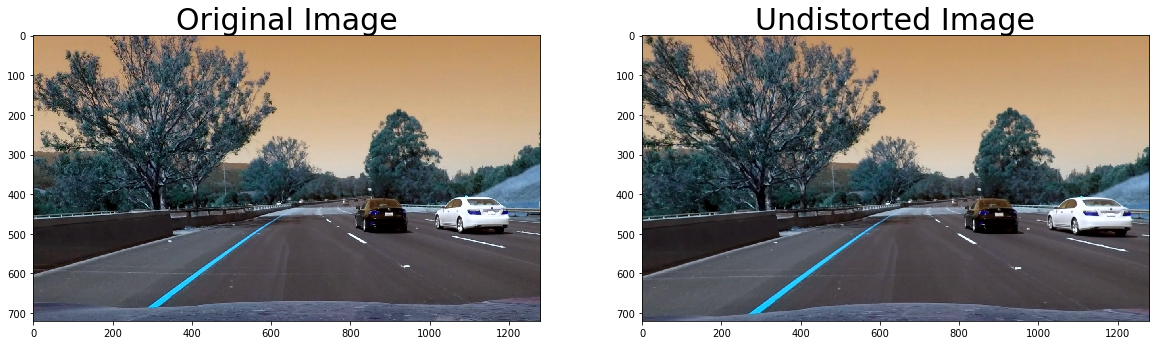

In [92]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('test_images/test6.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('test_images/test6_undst.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [90]:
# ## Perspective Transform
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = mpimg.imread('test_images/straight_lines1.jpg')
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def perspective_transform(img, nx, ny, mtx, dist, warp=True, height_pct=.62, bias=.25,bottom_trim=.70):
    # Convert undistorted image to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    # Search for corners in the grayscaled image
    #ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    #warped = None
    #M = None

    #if ret == True:
    # If we found corners, draw them! (just for fun)
    #cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
    # Choose offset from image corners to plot detected corners
    # This should be chosen to present the result at the proper aspect ratio
    # My choice of 100 pixels is not exact, but close enough for our purpose here
    offset = 100 # offset for dst points
    # Grab the image shape
    img_size = (gray.shape[1], gray.shape[0])

    # For source points I'm grabbing the outer four detected corners
    bottom_width = .76
    middle_width = .08
    w,h = 1280,720
    x,y = 0.5*w, 0.8*h
    src = np.float32([[200./1280*w,720./720*h],
                  [453./1280*w,547./720*h],
                  [835./1280*w,547./720*h],
                  [1100./1280*w,720./720*h]])
    dst = np.float32([[(w-x)/2.,h],
                  [(w-x)/2.,0.82*h],
                  [(w+x)/2.,0.82*h],
                  [(w+x)/2.,h]])
    # For destination points, I'm arbitrarily choosing some points to be
    # a nice fit for displaying our warped result 
    # again, not exact, but close enough for our purposes
    #dst = np.float32(dst_cor)
    # Given src and dst points, calculate the perspective transform matrix
    if(warp):
        M = cv2.getPerspectiveTransform(src, dst)
    else:
        M = cv2.getPerspectiveTransform(dst, src)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(gray, M, img_size)

#     src = np.array([[200./1280*w,720./720*h],
#                   [453./1280*w,547./720*h],
#                   [835./1280*w,547./720*h],
#                   [1100./1280*w,720./720*h]], np.int32)
#     src = src.reshape((-1,1,2))
#     dst = np.array([[(w-x)/2.,h],
#                   [(w-x)/2.,0],
#                   [(w+x)/2.,0],
#                   [(w+x)/2.,h]], np.int32)
#     dst = dst.reshape((-1,1,2))

#     cv2.polylines(img,[src],True,(255,0,0),4)
#     cv2.polylines(warped,[dst],True,(255,0,0),4)

#     # Plot the result
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#     f.tight_layout()
#     ax1.imshow(img)
#     ax1.set_title('Original Image', fontsize=50)
#     ax2.imshow(warped)
#     ax2.set_title('Warped', fontsize=50)
#     plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#     combined = np.concatenate((img,warped), axis=1)
#     cv2.imwrite('output_images/warped_straight_lines.jpg', combined)

    # Return the resulting image and matrix
    return warped, M


(array([[[27, 23, 25],
         [27, 23, 25],
         [27, 23, 25],
         ..., 
         [80, 78, 91],
         [80, 78, 91],
         [80, 78, 91]],
 
        [[28, 24, 26],
         [28, 24, 26],
         [28, 23, 25],
         ..., 
         [79, 77, 90],
         [80, 78, 91],
         [80, 78, 91]],
 
        [[29, 25, 26],
         [29, 24, 26],
         [28, 24, 26],
         ..., 
         [79, 77, 90],
         [80, 77, 91],
         [80, 78, 91]],
 
        ..., 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ..., 
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ..., 
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ..., 
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], dtype=uint8),
 array([[ -5.09619810e-01,  -1.508238

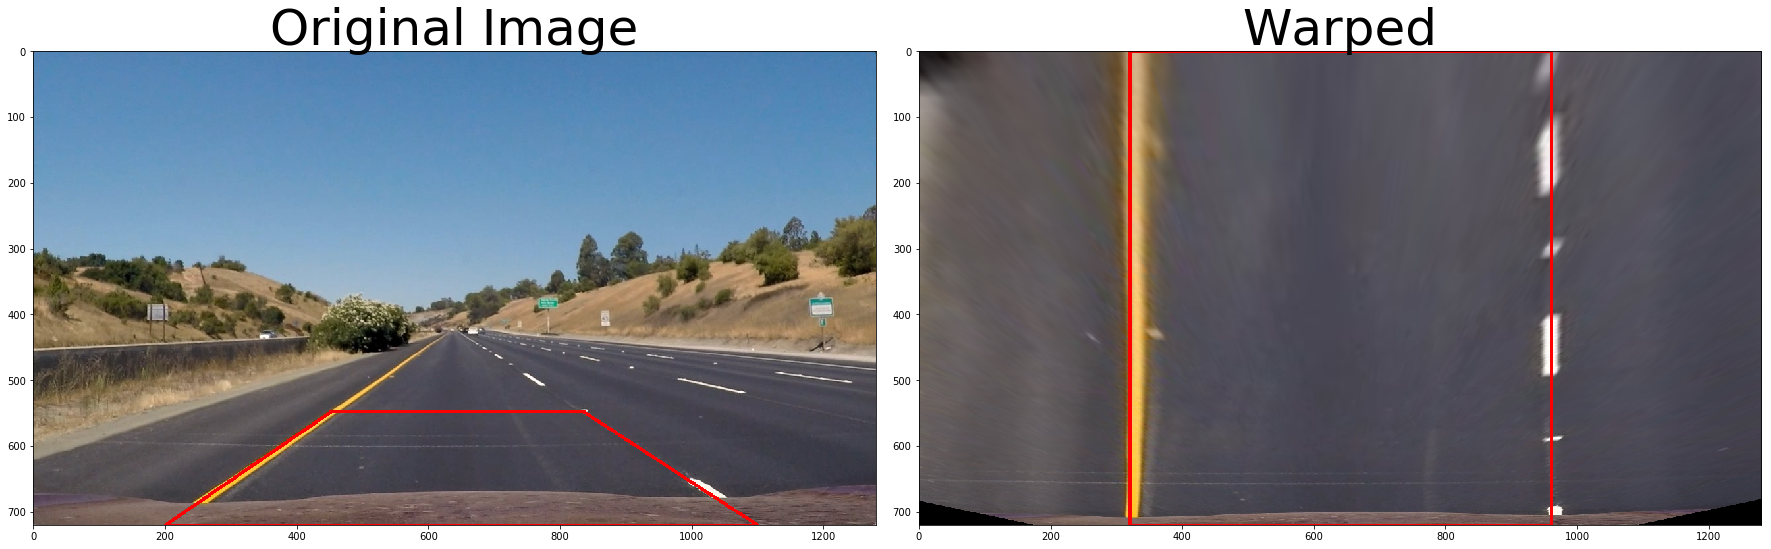

In [87]:
perspective_transform(img, nx, ny, mtx, dist, warp=True, height_pct=.62, bias=.25,bottom_trim=.70)

In [65]:
image = mpimg.imread('test_images/test5.jpg')

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    grad_binary = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return dir_binary


# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
ksize = 9
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 255))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(20, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))

In [14]:
# Generate x and y values for plotting
# ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
# left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
# right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
# out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
# plt.imshow(out_img)
# plt.plot(left_fitx, ploty, color='yellow')
# plt.plot(right_fitx, ploty, color='yellow')
# plt.xlim(0, 1280)
# plt.ylim(720, 0)

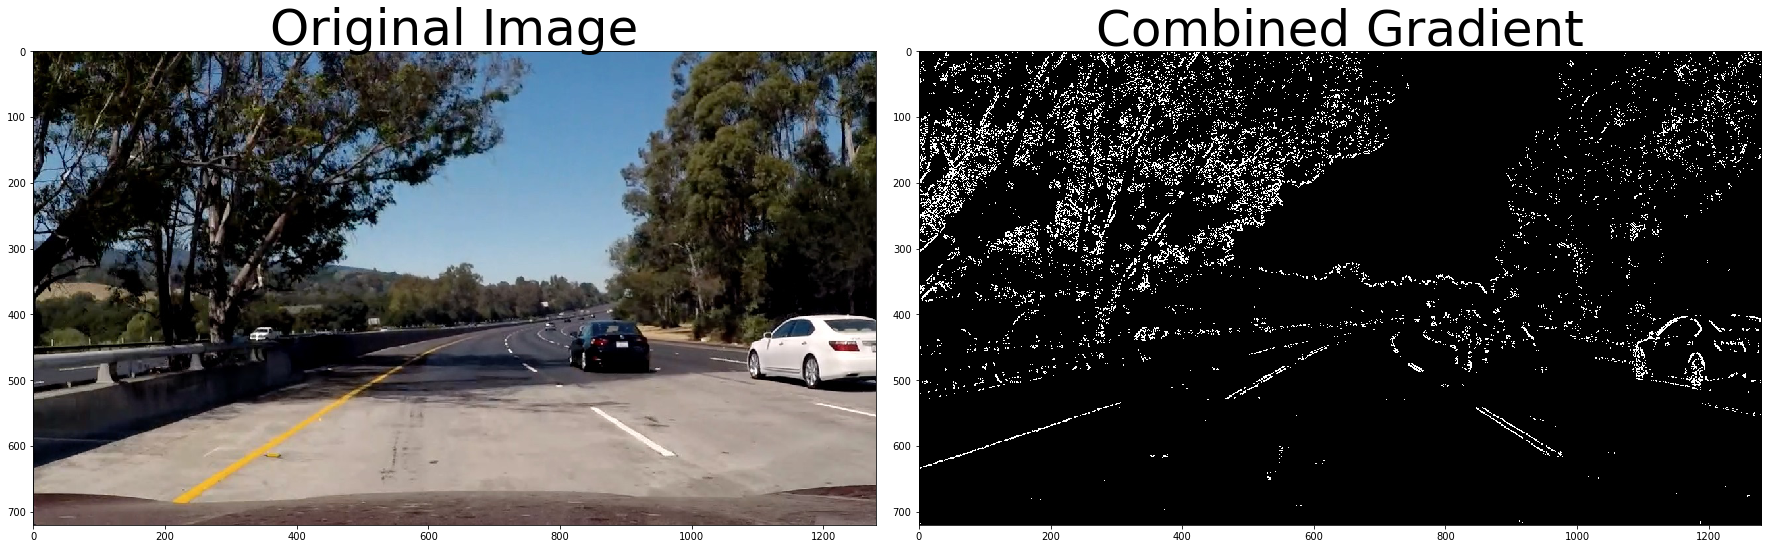

In [49]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) ] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
cv2.imwrite('output_images/binary_image.jpg', combined)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combined Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [27]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import numpy as np
# import cv2

# # Read in an image, you can also try test1.jpg or test4.jpg
# image = mpimg.imread('test_images/straight_lines2.jpg')

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def color_threshold(image, R_thresh = (0, 100), G_thresh = (0, 100), L_thresh=(35, 255), S_thresh=(15, 255), V_thresh=(15, 255)):
    R_channel = image[:,:,0]
    R_binary = np.zeros_like(R_channel)
    R_binary[(R_channel >= R_thresh[0]) & (R_channel <= R_thresh[1])] = 1

    G_channel = image[:,:,1]
    G_binary = np.zeros_like(G_channel)
    G_binary[(G_channel >= G_thresh[0]) & (G_channel <= G_thresh[1])] = 1

    # 1) Convert to HLS color space
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    S_channel = hls[:,:,2]
    S_binary = np.zeros_like(S_channel)
    S_binary[(S_channel >= S_thresh[0]) & (S_channel <= S_thresh[1])] = 1

    L_channel = hls[:,:,1]
    L_binary = np.zeros_like(L_channel)
    L_binary[(L_channel >= L_thresh[0]) & (L_channel <= L_thresh[1])] = 1

    # 1) Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # 2) Apply a threshold to the V channel
    V_channel = hsv[:,:,2]
    V_binary = np.zeros_like(V_channel)
    V_binary[(V_binary >= V_thresh[0]) & (V_binary <= V_thresh[1])] = 1

    binary_output = np.zeros_like(S_channel)
    binary_output[(((S_binary == 1) | (V_binary == 1)) & (L_binary==1)) | ((R_binary==1) & (G_channel==1))] = 1
    # 3) Return a binary image of threshold result
    # binary_output = np.copy(img) # placeholder line
    return binary_output
    
# color_binary = color_threshold(image, S_thresh=(90, 255), V_thresh=(50, 255))

# # Plot the result
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
# f.tight_layout()
# ax1.imshow(image)
# ax1.set_title('Original Image', fontsize=50)
# ax2.imshow(color_binary, cmap='gray')
# ax2.set_title('Thresholded S', fontsize=50)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [28]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None


In [29]:
class Tracker():
    def __init__(self,window_width, window_height, margin=25, ym=1, xm=1, smooth_factor=15):
        # all past (left,right) center set values used for smoothing the output
        self.recent_centers = []  
        # window pixel height of center values, used to count pixels inside center windows to determine curve values
        self.window_width = window_width 
        # window pixel height of center values, used to count pixels inside center windows to determine curve values
        # breaks the image into vertical levels
        self.window_height = window_height     
        # the pixel distance in bothdirections to slide (left_window+right_window) templates for searching
        self.margin = margin  
        #number of pixels per meter
        self.ym_per_pix = ym  
        #number of pixels per meter
        self.xm_per_pix = xm 
        #distance in meters of vehicle center from the line
        self.smooth_factor = smooth_factor 
    
    def find_window_centroids(self, warped):
        """ Find and store lane segment positions
        
        args: warped:
        return: average_line_centers:averaged value of of the line centers,
        helps to keep the markers from jumping around too much
        """
        window_width = self.window_width
        window_height = self.window_height
        margin = self.margin
        
        window_centroids = [] # store the (left,right) window centroids positions per level
        window = np.ones(window_width) # Create window templates for doing convolutions
        
        # First find the two starting positions right and left lines by using np.sum to get the vertical image slice
        # and then np.convolve the vertical image slice with the window  template
        
        # sum the bottom quarter of image to get slice
        l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(3*warped.shape[1]/2)], axis=0)
        l_center = np.argmax(np.convolve(window,l_sum)) - window_width/2
        r_sum = np.sum(warped[int(3*warped.shape[0]/4):int(3*warped.shape[1]/2),:], axis=0)
        r_center = np.argmax(np.convolve(window,r_sum)) - window_width/2 + int(warped.shape[1]/2)
        
        # add what we found for the first layer
        window_centroids.append((l_center,r_center))
        
        # Go through each layer looking for max pixel location
        for level in range(1,(int)(warped.shape[0]/window_height)):
            # convolve the window into the vertical slice of the image
            image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
            conv_signal = np.convolve(window,image_layer)
            # Find the best left centroid by using past left center as a reference 
            # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
            offset = window_width/2
            l_min_index = int(max(l_center+offset-margin,0))
            l_max_index = int(max(l_center+offset+margin,warped.shape[1]))
            l_center = np.argmax(conv_signal[l_min_index:l_max_index]) + l_min_index - offset
            
            # Find the best right centroid by using past right center as a reference
            r_min_index = int(max(r_center+offset-margin,0))
            r_max_index = int(max(r_center+offset+margin,warped.shape[1]))
            r_center = np.argmax(conv_signal[r_min_index:r_max_index]) + r_min_index - offset
            # Add what we found for the layer
            window_centroids.append((l_center,r_center))
        
        self.recent_centers.append(window_centroids)
        # return averaged value of of the line centers, helps to keep the markers from jumping around too much
        average_line_centers = np.average(self.recent_centers[-self.smooth_factor:], axis=0)
        return average_line_centers
    

In [30]:
def window_mask(width,height,img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width)):min(int(center+width),img_ref.shape[1])] = 1
    return output

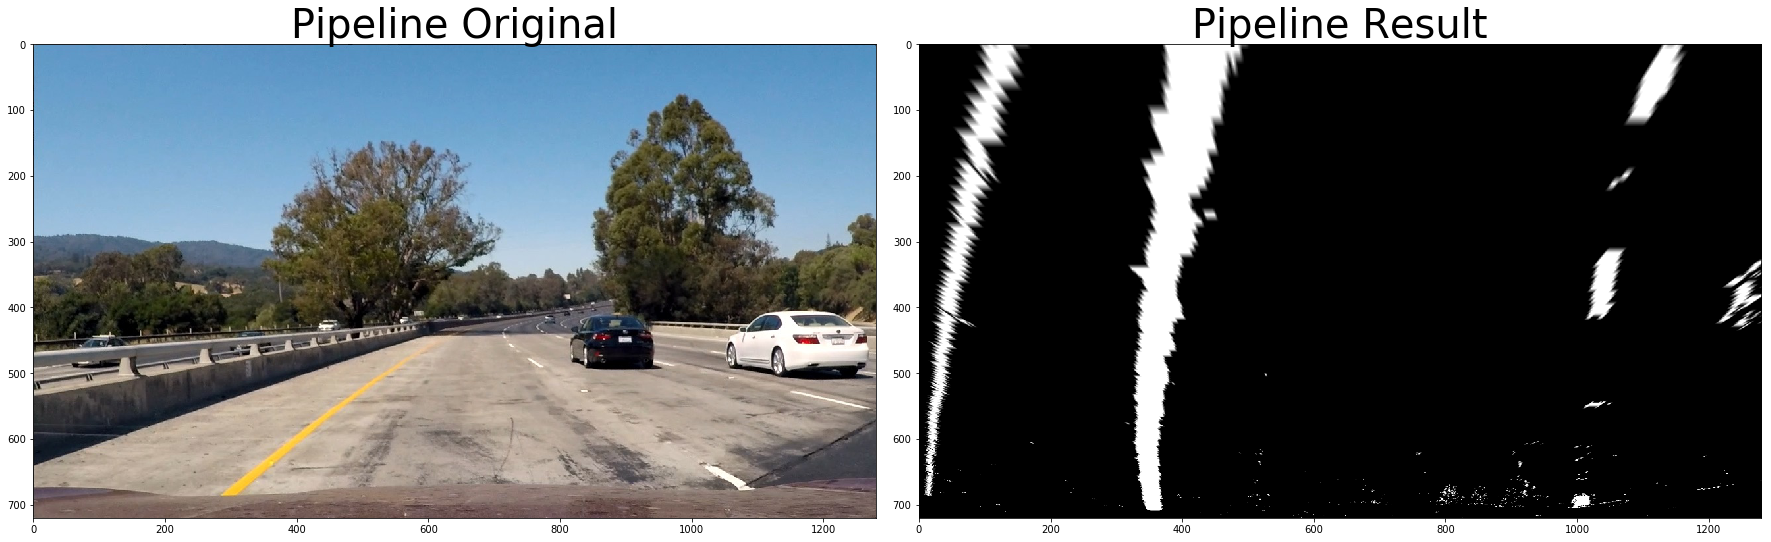

In [56]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread('test_images/test1.jpg')
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Pipeline Original', fontsize=40)

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# Edit this function to create your own pipeline.
def pipeline(img, mtx, dist, nx, ny, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    ksize = 9
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Threshold x gradient
    gradx = abs_sobel_thresh(img, orient='x', sobel_kernel=ksize, thresh=(20, 255))
    # Threshold y gradient
    grady = abs_sobel_thresh(img, orient='y', sobel_kernel=ksize, thresh=(20, 255))
    # Threshold color channel
    color_binary = color_threshold(img, S_thresh=(100, 255), V_thresh=(100, 255))
    # Combine the binary thresholds
    pre_process_image = np.zeros_like(img[:,:,0])
    pre_process_image[((gradx == 1) & (grady == 1)| color_binary == 1)] = 255
    
    
    result, perspective_M = perspective_transform(pre_process_image, nx, ny, mtx, dist, height_pct=.62, bias=.10,bottom_trim=.935)
    
    return result
    
binary_warped= pipeline(image,mtx, dist, nx, ny)


ax2.imshow(binary_warped, cmap='gray')
# cv2.imwrite('output_images/binary_warped.jpg', binary_warped)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [94]:

def process_image(image):
    """
    """
    # Read in the saved camera matrix and distortion coefficients
    # These are the arrays you calculated using cv2.calibrateCamera()
    dist_pickle = pickle.load( open( "camera_cal/wide_dist_pickle.p", "rb" ) )
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    nx = 9 # the number of inside corners in x
    ny = 6 # the number of inside corners in y

    binary_warped= pipeline(image,mtx, dist, nx, ny)

    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
    print('histogram.shape',histogram.shape)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image

    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 650

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
#         cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
#         cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Create an image to draw on and an image to show the selection window
#     out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    line_pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
#     cv2.fillPoly(window_img, np.int_([line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
#     road_warped, perspective_M = perspective_transform(result, nx, ny, mtx, dist, warp=False)
#     result = cv2.addWeighted(image, 1, road_warped, 0.9, 0)

#     # Define conversions in x and y from pixels space to meters
#     ym_per_pix = 30/720 # meters per pixel in y dimension
#     xm_per_pix = 3.7/700 # meters per pixel in x dimension

#     # Fit new polynomials to x,y in world space
#     left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
#     right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
#     y_eval = np.max(ploty)
#     # Calculate the new radii of curvature
#     left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
#     right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
#     # Now our radius of curvature is in meters
#     print(left_curverad, 'm', right_curverad, 'm')
#     # Example values: 632.1 m    626.2 m

#     # Calculate the offset of the car on the road
#     camera_center = (left_fitx[-1]+right_fitx[-1])/2
#     center_diff = (camera_center-binary_warped.shape[1]/2)*xm_per_pix
#     side_pos = 'left'
#     if(center_diff<=0):
#         side_pos = 'right'
#     # Draw the text showing curvature, offset, and speed
#     cv2.putText(result, 'Radius of Curvature = '+str(round((left_curverad+right_curverad)/2,3))+'(m)',(50,50), cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3)
#     cv2.putText(result, 'Vehicle is '+str(round(center_diff,3))+'(m) '+side_pos+' of center',(50,100), cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3)
#     plt.imshow(result)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
#     plt.xlim(0, 1280)
#     plt.ylim(720, 0)
    return result

histogram.shape (1280,)


(720, 0)

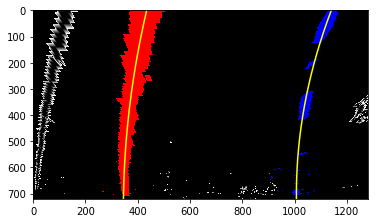

In [95]:
imagex = mpimg.imread('test_images/test1.jpg')
result = process_image(imagex)
cv2.imwrite('output_images/color_fit_lines.jpg', result)
plt.imshow(result)
plt.xlim(0, 1280)
plt.ylim(720, 0)


['straight_lines1.jpg', 'straight_lines2.jpg', 'test1.jpg', 'test2.jpg', 'test3.jpg', 'test4.jpg', 'test5.jpg', 'test6.jpg', 'test6_undst.jpg']
image_name straight_lines1.jpg
histogram.shape (1280,)
10696.467531 m 13696.6293475 m
image_name straight_lines2.jpg
histogram.shape (1280,)
11252.275446 m 12007.4591986 m
image_name test1.jpg
histogram.shape (1280,)
1102.35431515 m 611.474662777 m
image_name test2.jpg
histogram.shape (1280,)
500.358654786 m 476.88889038 m
image_name test3.jpg
histogram.shape (1280,)
785.599354687 m 593.303086694 m
image_name test4.jpg
histogram.shape (1280,)
821.016199112 m 413.964157899 m
image_name test5.jpg
histogram.shape (1280,)
680.863820605 m 622.517839632 m
image_name test6.jpg
histogram.shape (1280,)
1287.33923905 m 693.458116328 m
image_name test6_undst.jpg
histogram.shape (1280,)
1323.5783362 m 654.533793336 m


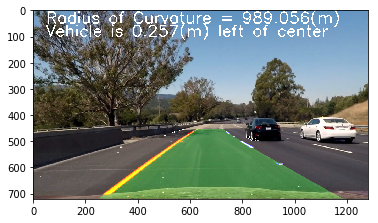

In [33]:
# imagex = mpimg.imread('test_images/test1.jpg')
# result = process_image(imagex)
# cv2.imwrite('output_images/test1.jpg', result)
# plt.imshow(result)
# plt.xlim(0, 1280)
# plt.ylim(720, 0)

import os
dirs = os.listdir("test_images/")
print(dirs)
for image_name in dirs:
    print('image_name',image_name)
    imagex = mpimg.imread('test_images/'+ image_name)
    result = process_image(imagex)
    cv2.imwrite('output_images/'+ image_name, result)
    plt.imshow(result)
    plt.xlim(0, 1280)
    plt.ylim(720, 0)


In [1184]:
def process_fit_image(binary_warped, left_fit, margin=100):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    plt.imshow(result)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [1120]:
import os
dirs = os.listdir("test_images/")
print(dirs)

['straight_lines1.jpg', 'straight_lines2.jpg', 'test1.jpg', 'test2.jpg', 'test3.jpg', 'test4.jpg', 'test5.jpg', 'test6.jpg', 'test6_undst.jpg']


## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

1287.33923905 m 693.458116328 m
1287.33923905 m 693.458116328 m
1287.33923905 m 693.458116328 m
1287.33923905 m 693.458116328 m
1287.33923905 m 693.458116328 m
1287.33923905 m 693.458116328 m
1287.33923905 m 693.458116328 m
1287.33923905 m 693.458116328 m
1287.33923905 m 693.458116328 m


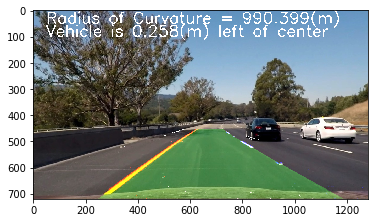

In [1185]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.
# Read in and grayscale the image
# plt.imshow(image)
# for file in dirs:
# print(file)
for image_name in dirs:
    imagex = mpimg.imread('test_images/'+ image_name)
    result = process_image(imagex)
    cv2.imwrite('output_images/'+ image_name, result)
    plt.imshow(result)

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [35]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Let's try the one with the solid white lane on the right first ...

In [36]:
white_output = 'videos_output/project_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

histogram.shape (1280,)
532.061484227 m 477.529212704 m
[MoviePy] >>>> Building video videos_output/project_video.mp4
[MoviePy] Writing video videos_output/project_video.mp4


  0%|          | 0/1261 [00:00<?, ?it/s]

histogram.shape (1280,)
532.061484227 m 477.529212704 m


  0%|          | 1/1261 [00:00<03:25,  6.14it/s]

histogram.shape (1280,)


  0%|          | 2/1261 [00:00<03:18,  6.35it/s]

494.17324815 m 604.882455164 m


  0%|          | 3/1261 [00:00<04:18,  4.87it/s]

histogram.shape (1280,)
493.818703208 m 798.640281353 m


  0%|          | 4/1261 [00:00<04:11,  5.00it/s]

histogram.shape (1280,)
495.516520752 m 1029.63622967 m
histogram.shape (1280,)


  0%|          | 6/1261 [00:01<04:04,  5.14it/s]

515.659358885 m 968.751471761 m
histogram.shape (1280,)
523.902689002 m 763.55446155 m


  1%|          | 8/1261 [00:01<03:34,  5.83it/s]

histogram.shape (1280,)
555.603105737 m 720.375809057 m
histogram.shape (1280,)
551.112476946 m 1503.30868898 m


  1%|          | 9/1261 [00:01<03:31,  5.91it/s]

histogram.shape (1280,)
575.261501078 m 1815.50164073 m
histogram.shape (1280,)


  1%|          | 10/1261 [00:01<03:36,  5.78it/s]

606.922798195 m 1083.64364406 m
histogram.shape (1280,)


  1%|          | 12/1261 [00:02<03:52,  5.38it/s]

627.626792889 m 499.458989223 m
histogram.shape (1280,)
671.410861665 m 857.439922598 m


  1%|          | 13/1261 [00:02<03:39,  5.69it/s]

histogram.shape (1280,)
684.467496163 m 523.359637037 m
histogram.shape (1280,)
694.708660536 m 683.909107582 m


  1%|▏         | 16/1261 [00:02<03:13,  6.42it/s]

histogram.shape (1280,)
666.559104291 m 908.292491919 m
histogram.shape (1280,)
680.895517369 m 1167.34352072 m


  1%|▏         | 18/1261 [00:03<03:12,  6.44it/s]

histogram.shape (1280,)
637.130037914 m 1028.37122874 m
histogram.shape (1280,)
672.739807691 m 835.693224036 m


  2%|▏         | 20/1261 [00:03<03:05,  6.68it/s]

histogram.shape (1280,)
690.171107501 m 886.193593476 m
histogram.shape (1280,)
708.153499689 m 781.582003123 m


  2%|▏         | 22/1261 [00:03<02:56,  7.01it/s]

histogram.shape (1280,)
786.4755391 m 999.382684668 m
histogram.shape (1280,)
775.707097367 m 1100.91146368 m


  2%|▏         | 24/1261 [00:04<03:03,  6.75it/s]

histogram.shape (1280,)
766.163357999 m 909.702135599 m
histogram.shape (1280,)
718.654991157 m 476.70220813 m


  2%|▏         | 26/1261 [00:04<03:10,  6.49it/s]

histogram.shape (1280,)
668.147583441 m 430.862439417 m
histogram.shape (1280,)
677.434055722 m 412.601366269 m


  2%|▏         | 28/1261 [00:04<03:08,  6.54it/s]

histogram.shape (1280,)
635.816846612 m 471.633480804 m
histogram.shape (1280,)
634.702086828 m 552.960831021 m


  2%|▏         | 30/1261 [00:04<03:09,  6.49it/s]

histogram.shape (1280,)
594.04368813 m 661.218237248 m
histogram.shape (1280,)
525.519036562 m 864.923907582 m


  3%|▎         | 32/1261 [00:05<03:06,  6.60it/s]

histogram.shape (1280,)
500.084447465 m 829.381408473 m
histogram.shape (1280,)
460.542450445 m 630.967902984 m


  3%|▎         | 34/1261 [00:05<03:00,  6.79it/s]

histogram.shape (1280,)
471.176481614 m 873.21156462 m
histogram.shape (1280,)
451.497303866 m 561.537777176 m


  3%|▎         | 36/1261 [00:05<02:54,  7.01it/s]

histogram.shape (1280,)
433.725522826 m 856.56087822 m
histogram.shape (1280,)
417.413825742 m 303.4042477 m


  3%|▎         | 38/1261 [00:06<03:00,  6.79it/s]

histogram.shape (1280,)
394.389024247 m 383.481076226 m
histogram.shape (1280,)
367.450363061 m 460.007718292 m


  3%|▎         | 40/1261 [00:06<03:04,  6.61it/s]

histogram.shape (1280,)
365.401053999 m 580.168713247 m
histogram.shape (1280,)
369.249963556 m 625.405472374 m


  3%|▎         | 42/1261 [00:06<03:02,  6.69it/s]

histogram.shape (1280,)
380.721141181 m 614.067021639 m
histogram.shape (1280,)
380.002085642 m 586.584882116 m


  3%|▎         | 44/1261 [00:07<03:04,  6.60it/s]

histogram.shape (1280,)
402.806497534 m 542.46821413 m
histogram.shape (1280,)
425.503241226 m 578.576931564 m


  4%|▎         | 46/1261 [00:07<03:03,  6.62it/s]

histogram.shape (1280,)
459.095673237 m 529.708621728 m
histogram.shape (1280,)
478.586292589 m 476.262593362 m


  4%|▍         | 48/1261 [00:07<02:58,  6.81it/s]

histogram.shape (1280,)
497.477934448 m 506.013022122 m
histogram.shape (1280,)
512.752680025 m 1008.57195022 m


  4%|▍         | 50/1261 [00:07<03:09,  6.38it/s]

histogram.shape (1280,)
587.681337761 m 406.653636296 m
histogram.shape (1280,)
590.051786249 m 345.02509915 m


  4%|▍         | 51/1261 [00:08<03:07,  6.44it/s]

histogram.shape (1280,)
604.467076207 m 407.075000366 m
histogram.shape (1280,)
663.500817765 

  4%|▍         | 54/1261 [00:08<03:02,  6.62it/s]

m 538.310384226 m
histogram.shape (1280,)
631.947122484 m 606.303133484 m
histogram.shape (1280,)
615.513634825 m 668.101791513 m


  4%|▍         | 56/1261 [00:08<03:06,  6.46it/s]

histogram.shape (1280,)
687.241671845 m 704.838253199 m
histogram.shape (1280,)
719.919532056 m 660.07312951 m


  5%|▍         | 58/1261 [00:09<03:06,  6.44it/s]

histogram.shape (1280,)
716.928337103 m 653.040288154 m
histogram.shape (1280,)
719.546296021 m 783.63582145 m


  5%|▍         | 60/1261 [00:09<03:08,  6.37it/s]

histogram.shape (1280,)
668.518935012 m 406.527209001 m
histogram.shape (1280,)
613.304490764 m 444.412687509 m


  5%|▍         | 62/1261 [00:09<03:06,  6.44it/s]

histogram.shape (1280,)
606.975217354 m 512.290286752 m
histogram.shape (1280,)
574.591968709 m 721.210059911 m


  5%|▌         | 64/1261 [00:10<03:03,  6.52it/s]

histogram.shape (1280,)
601.759486121 m 859.995580867 m
histogram.shape (1280,)
571.785142568 m 780.675752374 m


  5%|▌         | 66/1261 [00:10<02:56,  6.76it/s]

histogram.shape (1280,)
583.893339605 m 772.034637096 m
histogram.shape (1280,)
576.538733064 m 913.878034363 m


  5%|▌         | 68/1261 [00:10<02:55,  6.80it/s]

histogram.shape (1280,)
601.266071084 m 785.177542366 m
histogram.shape (1280,)
647.454993929 m 725.371731842 m


  6%|▌         | 70/1261 [00:11<02:58,  6.68it/s]

histogram.shape (1280,)
621.775614486 m 707.215117098 m
histogram.shape (1280,)
682.402662467 m 536.803572636 m


  6%|▌         | 72/1261 [00:11<03:02,  6.52it/s]

histogram.shape (1280,)
699.603168108 m 294.435151767 m
histogram.shape (1280,)
752.007934828 m 516.36725859 m


  6%|▌         | 74/1261 [00:11<02:58,  6.64it/s]

histogram.shape (1280,)
811.241306936 m 358.50151792 m
histogram.shape (1280,)
833.464395624 m 430.686805119 m


  6%|▌         | 76/1261 [00:11<03:01,  6.53it/s]

histogram.shape (1280,)
902.38150987 m 483.92963896 m
histogram.shape (1280,)
886.852746515 m 535.744918032 m


  6%|▌         | 78/1261 [00:12<03:01,  6.52it/s]

histogram.shape (1280,)
1014.16887405 m 537.149724261 m
histogram.shape (1280,)
1079.6358486 m 637.786925656 m


  6%|▋         | 80/1261 [00:12<03:00,  6.54it/s]

histogram.shape (1280,)
1153.4747052 m 667.708162218 m
histogram.shape (1280,)
1122.3094814 m 821.239218268 m


  7%|▋         | 82/1261 [00:12<03:00,  6.55it/s]

histogram.shape (1280,)
1082.35992375 m 751.399060541 m
histogram.shape (1280,)
1046.85763137 m 692.763342967 m


  7%|▋         | 84/1261 [00:13<02:52,  6.83it/s]

histogram.shape (1280,)
964.635158939 m 794.68062918 m
histogram.shape (1280,)
1007.50433007 m 782.118295986 m


  7%|▋         | 86/1261 [00:13<02:49,  6.93it/s]

histogram.shape (1280,)
890.970829439 m 1437.7470099 m
histogram.shape (1280,)
829.941735352 m 3224.34363479 m


  7%|▋         | 88/1261 [00:13<02:51,  6.83it/s]

histogram.shape (1280,)
686.49262145 m 440.774758998 m
histogram.shape (1280,)
576.388615189 m 575.767314072 m


  7%|▋         | 90/1261 [00:14<03:00,  6.50it/s]

histogram.shape (1280,)
557.162524548 m 747.533136279 m
histogram.shape (1280,)
506.644889724 m 809.881669317 m


  7%|▋         | 92/1261 [00:14<02:58,  6.55it/s]

histogram.shape (1280,)
509.845447768 m 771.604796165 m
histogram.shape (1280,)
531.401518551 m 715.49832878 m


  7%|▋         | 94/1261 [00:14<02:55,  6.66it/s]

histogram.shape (1280,)
502.135519562 m 715.824014327 m
histogram.shape (1280,)
507.661593155 m 752.378159649 m


  8%|▊         | 96/1261 [00:14<02:53,  6.70it/s]

histogram.shape (1280,)
541.046887402 m 845.412707758 m
histogram.shape (1280,)
556.131428747 m 634.234613054 m


  8%|▊         | 98/1261 [00:15<02:53,  6.71it/s]

histogram.shape (1280,)
532.853615452 m 611.936563328 m
histogram.shape (1280,)
557.245481397 m 640.981897401 m


  8%|▊         | 100/1261 [00:15<02:52,  6.73it/s]

histogram.shape (1280,)
534.439434061 m 399.381960033 m
histogram.shape (1280,)
545.389767187 m 634.382142038 m


  8%|▊         | 102/1261 [00:15<02:57,  6.52it/s]

histogram.shape (1280,)
524.7102049 m 518.987884723 m
histogram.shape (1280,)
508.922375414 m 621.040783947 m


  8%|▊         | 104/1261 [00:16<02:57,  6.53it/s]

histogram.shape (1280,)
513.530110662 m 698.599634551 m
histogram.shape (1280,)
513.678314279 m 735.73169954 m


  8%|▊         | 106/1261 [00:16<02:55,  6.57it/s]

histogram.shape (1280,)
538.255129589 m 767.616046218 m
histogram.shape (1280,)
558.077689536 m 828.706141146 m


  9%|▊         | 108/1261 [00:16<02:55,  6.58it/s]

histogram.shape (1280,)
566.253083388 m 784.14834757 m
histogram.shape (1280,)
518.101417307 m 574.869486816 m


  9%|▊         | 110/1261 [00:17<02:56,  6.51it/s]

histogram.shape (1280,)
520.751478207 m 836.175820807 m
histogram.shape (1280,)
520.96454369 m 781.45315479 m


  9%|▉         | 112/1261 [00:17<02:55,  6.56it/s]

histogram.shape (1280,)
492.830795866 m 383.082145936 m
histogram.shape (1280,)
540.065481726 m 610.245172887 m


  9%|▉         | 114/1261 [00:17<02:52,  6.66it/s]

histogram.shape (1280,)
491.748979979 m 387.901882484 m
histogram.shape (1280,)
469.663962099 m 702.756425459 m


  9%|▉         | 116/1261 [00:17<02:53,  6.61it/s]

histogram.shape (1280,)
438.060705626 m 523.866660841 m
histogram.shape (1280,)
438.344434659 m 524.398681192 m


  9%|▉         | 118/1261 [00:18<02:54,  6.56it/s]

histogram.shape (1280,)
456.221298713 m 545.626430125 m
histogram.shape (1280,)
453.901114786 m 521.841834461 m


 10%|▉         | 120/1261 [00:18<02:51,  6.65it/s]

histogram.shape (1280,)
449.250719318 m 500.81530195 m
histogram.shape (1280,)
438.546344733 m 497.869080683 m


 10%|▉         | 122/1261 [00:18<02:56,  6.44it/s]

histogram.shape (1280,)
451.977782751 m 531.630316998 m
histogram.shape (1280,)
450.038769662 m 327.19517191 m


 10%|▉         | 124/1261 [00:19<02:52,  6.60it/s]

histogram.shape (1280,)
442.385285941 m 331.326332835 m
histogram.shape (1280,)
445.318433272 m 395.55009941 m


 10%|▉         | 126/1261 [00:19<02:47,  6.76it/s]

histogram.shape (1280,)
445.542481708 m 798.526520351 m
histogram.shape (1280,)
474.349202201 m 688.142691285 m


 10%|█         | 128/1261 [00:19<02:49,  6.68it/s]

histogram.shape (1280,)
467.300755962 m 599.440576442 m
histogram.shape (1280,)
485.667337184 m 635.076701934 m


 10%|█         | 130/1261 [00:20<02:47,  6.76it/s]

histogram.shape (1280,)
471.497659753 m 577.050169671 m
histogram.shape (1280,)
498.762573884 m 571.21233133 m


 10%|█         | 132/1261 [00:20<02:45,  6.83it/s]

histogram.shape (1280,)
515.807301167 m 581.63495633 m
histogram.shape (1280,)
519.224421951 m 519.683219986 m


 11%|█         | 134/1261 [00:20<02:43,  6.90it/s]

histogram.shape (1280,)
527.977418438 m 472.274860446 m
histogram.shape (1280,)
533.397211924 m 624.835080663 m


 11%|█         | 136/1261 [00:20<02:43,  6.89it/s]

histogram.shape (1280,)
554.950380816 m 646.871410112 m
histogram.shape (1280,)
562.435565004 m 424.919749451 m


 11%|█         | 138/1261 [00:21<02:46,  6.73it/s]

histogram.shape (1280,)
611.11013588 m 483.572798365 m
histogram.shape (1280,)
624.20808799 m 559.058986223 m


 11%|█         | 140/1261 [00:21<02:47,  6.70it/s]

histogram.shape (1280,)
619.663634268 m 706.075460623 m
histogram.shape (1280,)
663.120274881 m 735.686490926 m


 11%|█▏        | 142/1261 [00:21<02:50,  6.58it/s]

histogram.shape (1280,)
650.261462702 m 957.208625452 m
histogram.shape (1280,)
657.792483379 m 1045.11143565 m


 11%|█▏        | 144/1261 [00:22<02:47,  6.65it/s]

histogram.shape (1280,)
673.758578014 m 884.230121425 m
histogram.shape (1280,)
648.566350337 m 808.585561877 m


 12%|█▏        | 146/1261 [00:22<02:48,  6.64it/s]

histogram.shape (1280,)
673.820698056 m 937.085112126 m
histogram.shape (1280,)
651.145904471 m 573.554679255 m


 12%|█▏        | 148/1261 [00:22<02:46,  6.70it/s]

histogram.shape (1280,)
684.599623681 m 395.625441926 m
histogram.shape (1280,)
573.878084427 m 424.342769109 m


 12%|█▏        | 150/1261 [00:23<02:44,  6.73it/s]

histogram.shape (1280,)
553.305465129 m 509.94738017 m
histogram.shape (1280,)
588.667679498 m 551.830539076 m


 12%|█▏        | 151/1261 [00:23<02:45,  6.72it/s]

histogram.shape (1280,)
621.265224926 m 663.323568622 m
histogram.shape (1280,)
647.412588248 m

 12%|█▏        | 154/1261 [00:23<02:46,  6.66it/s]

 674.533800606 m
histogram.shape (1280,)
597.340813457 m 750.912734076 m
histogram.shape (1280,)
635.812417401 m 815.560048451 m


 12%|█▏        | 156/1261 [00:23<02:38,  6.95it/s]

histogram.shape (1280,)
620.690451631 m 992.582689199 m
histogram.shape (1280,)
606.027473294 m 756.836815556 m


 13%|█▎        | 158/1261 [00:24<02:36,  7.04it/s]

histogram.shape (1280,)
592.300758927 m 839.073982771 m
histogram.shape (1280,)
556.928753616 m 664.213882794 m


 13%|█▎        | 160/1261 [00:24<02:35,  7.09it/s]

histogram.shape (1280,)
580.525871214 m 447.565279241 m
histogram.shape (1280,)
524.444823057 m 721.8820691 m


 13%|█▎        | 162/1261 [00:24<02:36,  7.04it/s]

histogram.shape (1280,)
563.146339895 m 438.923846869 m
histogram.shape (1280,)
548.860710813 m 461.341252117 m


 13%|█▎        | 164/1261 [00:25<02:44,  6.66it/s]

histogram.shape (1280,)
568.487311254 m 533.405878911 m
histogram.shape (1280,)
538.828522177 m 687.513015452 m


 13%|█▎        | 166/1261 [00:25<02:44,  6.66it/s]

histogram.shape (1280,)
522.481888442 m 727.390296191 m
histogram.shape (1280,)
541.877058658 m 688.218332012 m


 13%|█▎        | 168/1261 [00:25<02:37,  6.95it/s]

histogram.shape (1280,)
508.510817661 m 613.99318154 m
histogram.shape (1280,)
544.969336149 m 762.009535519 m


 13%|█▎        | 170/1261 [00:25<02:39,  6.83it/s]

histogram.shape (1280,)
607.849832625 m 611.301439904 m
histogram.shape (1280,)
650.120072856 m 624.636705276 m


 14%|█▎        | 172/1261 [00:26<02:44,  6.63it/s]

histogram.shape (1280,)
661.124187089 m 458.751619319 m
histogram.shape (1280,)
662.09993446 m 343.270897766 m


 14%|█▍        | 174/1261 [00:26<02:42,  6.69it/s]

histogram.shape (1280,)
587.516931209 m 249.500884905 m
histogram.shape (1280,)
524.399813926 m 296.184708021 m


 14%|█▍        | 176/1261 [00:26<02:44,  6.59it/s]

histogram.shape (1280,)
493.330120414 m 325.094540572 m
histogram.shape (1280,)
476.135524861 m 368.78156425 m


 14%|█▍        | 178/1261 [00:27<02:44,  6.59it/s]

histogram.shape (1280,)
531.59048517 m 371.868758169 m
histogram.shape (1280,)
532.078814905 m 379.31211453 m


 14%|█▍        | 180/1261 [00:27<02:43,  6.61it/s]

histogram.shape (1280,)
522.60787235 m 409.229967505 m
histogram.shape (1280,)
517.38603096 m 435.76772322 m


 14%|█▍        | 182/1261 [00:27<02:40,  6.71it/s]

histogram.shape (1280,)
464.784446757 m 370.538918865 m
histogram.shape (1280,)
470.424708399 m 421.939929789 m


 15%|█▍        | 184/1261 [00:28<02:39,  6.76it/s]

histogram.shape (1280,)
439.327343991 m 398.084718039 m
histogram.shape (1280,)
406.582449552 m 560.884898131 m


 15%|█▍        | 186/1261 [00:28<02:38,  6.77it/s]

histogram.shape (1280,)
366.377985508 m 608.079168705 m
histogram.shape (1280,)
336.160131115 m 532.535505667 m


 15%|█▍        | 188/1261 [00:28<02:34,  6.94it/s]

histogram.shape (1280,)
339.002657268 m 651.397123051 m
histogram.shape (1280,)
331.574705798 m 462.496099875 m


 15%|█▌        | 190/1261 [00:28<02:36,  6.84it/s]

histogram.shape (1280,)
341.183022609 m 445.678407337 m
histogram.shape (1280,)
346.96482726 m 685.269948227 m


 15%|█▌        | 192/1261 [00:29<02:36,  6.82it/s]

histogram.shape (1280,)
341.805672604 m 505.756718537 m
histogram.shape (1280,)
361.110927553 m 486.6314767 m


 15%|█▌        | 194/1261 [00:29<02:35,  6.85it/s]

histogram.shape (1280,)
371.137915667 m 374.477267073 m
histogram.shape (1280,)
380.914580364 m 353.296970473 m


 16%|█▌        | 196/1261 [00:29<02:37,  6.74it/s]

histogram.shape (1280,)
386.228176572 m 319.138603773 m
histogram.shape (1280,)
462.631269113 m 280.046334886 m


 16%|█▌        | 198/1261 [00:30<02:37,  6.75it/s]

histogram.shape (1280,)
539.889534729 m 782.033613809 m
histogram.shape (1280,)
595.463206161 m 1068.00105265 m


 16%|█▌        | 200/1261 [00:30<02:39,  6.65it/s]

histogram.shape (1280,)
666.577780002 m 965.556791192 m
histogram.shape (1280,)
647.062255317 m 689.603419538 m


 16%|█▌        | 202/1261 [00:30<02:39,  6.64it/s]

histogram.shape (1280,)
633.38241653 m 483.591666627 m
histogram.shape (1280,)
601.527803722 m 815.291004577 m


 16%|█▌        | 204/1261 [00:31<02:37,  6.69it/s]

histogram.shape (1280,)
562.268968104 m 542.260140977 m
histogram.shape (1280,)
562.253525091 m 646.383729554 m


 16%|█▋        | 206/1261 [00:31<02:31,  6.98it/s]

histogram.shape (1280,)
545.954733109 m 726.415733457 m
histogram.shape (1280,)
505.706144301 m 529.283285827 m


 16%|█▋        | 208/1261 [00:31<02:28,  7.07it/s]

histogram.shape (1280,)
445.898836359 m 529.388143646 m
histogram.shape (1280,)
425.197572798 m 464.361417115 m


 17%|█▋        | 210/1261 [00:31<02:31,  6.92it/s]

histogram.shape (1280,)
444.534016419 m 618.541568916 m
histogram.shape (1280,)
472.67045499 m 373.02614787 m


 17%|█▋        | 212/1261 [00:32<02:35,  6.73it/s]

histogram.shape (1280,)
496.220235658 m 593.936408515 m
histogram.shape (1280,)
477.68304331 m 404.308056719 m


 17%|█▋        | 214/1261 [00:32<02:37,  6.66it/s]

histogram.shape (1280,)
484.194571238 m 496.954544533 m
histogram.shape (1280,)
454.640140966 m 1289.17925433 m


 17%|█▋        | 216/1261 [00:32<02:36,  6.67it/s]

histogram.shape (1280,)
475.622133032 m 763.754462283 m
histogram.shape (1280,)
451.829438591 m 855.315305843 m


 17%|█▋        | 218/1261 [00:33<02:38,  6.59it/s]

histogram.shape (1280,)
474.386822026 m 864.349791306 m
histogram.shape (1280,)
514.115832845 m 909.477865256 m


 17%|█▋        | 220/1261 [00:33<02:37,  6.61it/s]

histogram.shape (1280,)
508.311729554 m 743.394462096 m
histogram.shape (1280,)
559.184979126 m 744.289961774 m


 18%|█▊        | 222/1261 [00:33<02:36,  6.64it/s]

histogram.shape (1280,)
551.614530579 m 880.197305178 m
histogram.shape (1280,)
563.53694225 m 1144.20298683 m


 18%|█▊        | 224/1261 [00:34<02:37,  6.60it/s]

histogram.shape (1280,)
583.526355932 m 815.278673074 m
histogram.shape (1280,)
577.317636679 m 487.444801641 m


 18%|█▊        | 226/1261 [00:34<02:36,  6.63it/s]

histogram.shape (1280,)
594.370493429 m 549.837732754 m
histogram.shape (1280,)
592.544138992 m 735.760377159 m


 18%|█▊        | 228/1261 [00:34<02:34,  6.68it/s]

histogram.shape (1280,)
591.307722628 m 822.921436728 m
histogram.shape (1280,)
630.780560681 m 978.780862825 m


 18%|█▊        | 230/1261 [00:35<02:40,  6.44it/s]

histogram.shape (1280,)
671.372850324 m 766.511231647 m
histogram.shape (1280,)
673.483984199 m 752.79429894 m


 18%|█▊        | 232/1261 [00:35<02:39,  6.46it/s]

histogram.shape (1280,)
661.788510696 m 667.33980002 m
histogram.shape (1280,)
744.266267421 m 597.311782865 m


 19%|█▊        | 234/1261 [00:35<02:35,  6.62it/s]

histogram.shape (1280,)
726.263712299 m 663.52460429 m
histogram.shape (1280,)
731.080042421 m 370.355336757 m


 19%|█▊        | 236/1261 [00:35<02:37,  6.52it/s]

histogram.shape (1280,)
700.74278313 m 303.484607236 m
histogram.shape (1280,)
624.227126342 m 593.605899865 m


 19%|█▉        | 238/1261 [00:36<02:34,  6.61it/s]

histogram.shape (1280,)
612.980105913 m 416.121799233 m
histogram.shape (1280,)
563.043572803 m 495.657470949 m


 19%|█▉        | 240/1261 [00:36<02:37,  6.48it/s]

histogram.shape (1280,)
552.373810665 m 464.924641648 m
histogram.shape (1280,)
548.97877207 m 502.450207589 m


 19%|█▉        | 242/1261 [00:36<02:38,  6.44it/s]

histogram.shape (1280,)
568.749307677 m 526.406999599 m
histogram.shape (1280,)
590.070114318 m 493.447828294 m


 19%|█▉        | 244/1261 [00:37<02:33,  6.64it/s]

histogram.shape (1280,)
545.571732722 m 445.254091702 m
histogram.shape (1280,)
562.831467501 m 466.609031779 m


 20%|█▉        | 246/1261 [00:37<02:34,  6.55it/s]

histogram.shape (1280,)
549.622990582 m 526.708841848 m
histogram.shape (1280,)
526.960249938 m 575.435730927 m


 20%|█▉        | 248/1261 [00:37<02:33,  6.59it/s]

histogram.shape (1280,)
528.771850633 m 424.928769658 m
histogram.shape (1280,)
494.349425957 m 623.631333219 m


 20%|█▉        | 250/1261 [00:38<02:34,  6.56it/s]

histogram.shape (1280,)
527.318454363 m 554.689379879 m
histogram.shape (1280,)
525.623907756 m 550.828775465 m


 20%|█▉        | 252/1261 [00:38<02:29,  6.76it/s]

histogram.shape (1280,)
548.035829192 m 537.603641241 m
histogram.shape (1280,)
568.28173307 m 564.872989486 m


 20%|██        | 254/1261 [00:38<02:27,  6.84it/s]

histogram.shape (1280,)
591.574295731 m 536.569692115 m
histogram.shape (1280,)
612.229048805 m 542.27257728 m


 20%|██        | 256/1261 [00:38<02:32,  6.61it/s]

histogram.shape (1280,)
593.664014905 m 541.920695486 m
histogram.shape (1280,)
620.199911503 m 403.053048146 m


 20%|██        | 258/1261 [00:39<02:29,  6.70it/s]

histogram.shape (1280,)
574.943043246 m 494.920396319 m
histogram.shape (1280,)
569.113221879 m 543.226885675 m


 21%|██        | 260/1261 [00:39<02:30,  6.65it/s]

histogram.shape (1280,)
573.891663608 m 403.150480124 m
histogram.shape (1280,)
582.667631185 m 537.430692887 m


 21%|██        | 262/1261 [00:39<02:29,  6.68it/s]

histogram.shape (1280,)
622.878688255 m 546.546422357 m
histogram.shape (1280,)
606.132509227 m 625.659600738 m


 21%|██        | 264/1261 [00:40<02:23,  6.95it/s]

histogram.shape (1280,)
596.578059084 m 634.746109094 m
histogram.shape (1280,)
594.527683648 m 531.637280893 m


 21%|██        | 266/1261 [00:40<02:25,  6.83it/s]

histogram.shape (1280,)
622.465091531 m 597.379711348 m
histogram.shape (1280,)
681.373439655 m 611.882944627 m


 21%|██▏       | 268/1261 [00:40<02:26,  6.76it/s]

histogram.shape (1280,)
631.795617007 m 633.77999744 m
histogram.shape (1280,)
645.094867204 m 637.694518066 m


 21%|██▏       | 270/1261 [00:41<02:28,  6.69it/s]

histogram.shape (1280,)
654.675792699 m 670.329968795 m
histogram.shape (1280,)
687.46628749 m 417.399449388 m


 22%|██▏       | 272/1261 [00:41<02:25,  6.79it/s]

histogram.shape (1280,)
666.475600784 m 442.25011518 m
histogram.shape (1280,)
632.103570428 m 724.005422738 m


 22%|██▏       | 274/1261 [00:41<02:22,  6.91it/s]

histogram.shape (1280,)
662.961419266 m 707.538810331 m
histogram.shape (1280,)
628.852344811 m 900.359856347 m


 22%|██▏       | 276/1261 [00:41<02:23,  6.87it/s]

histogram.shape (1280,)
651.046800883 m 808.205490571 m
histogram.shape (1280,)
725.426501997 m 890.307672165 m


 22%|██▏       | 278/1261 [00:42<02:24,  6.80it/s]

histogram.shape (1280,)
747.049782335 m 793.780957116 m
histogram.shape (1280,)
778.919260835 m 773.707624404 m


 22%|██▏       | 280/1261 [00:42<02:27,  6.65it/s]

histogram.shape (1280,)
770.516222187 m 816.961363522 m
histogram.shape (1280,)
824.902212559 m 764.831688057 m


 22%|██▏       | 282/1261 [00:42<02:23,  6.83it/s]

histogram.shape (1280,)
825.205816514 m 442.795063968 m
histogram.shape (1280,)
818.597423481 m 537.178127958 m


 23%|██▎       | 284/1261 [00:43<02:24,  6.77it/s]

histogram.shape (1280,)
850.575101433 m 577.009752621 m
histogram.shape (1280,)
845.900811317 m 683.13855611 m


 23%|██▎       | 286/1261 [00:43<02:41,  6.03it/s]

histogram.shape (1280,)
929.803198199 m 719.832425654 m
histogram.shape (1280,)
1007.25949658 m 885.221431834 m


 23%|██▎       | 288/1261 [00:43<02:39,  6.08it/s]

histogram.shape (1280,)
1079.61102584 m 1065.48385437 m
histogram.shape (1280,)
1011.02662168 m 1220.23694713 m


 23%|██▎       | 290/1261 [00:44<02:36,  6.22it/s]

histogram.shape (1280,)
1142.99796524 m 948.026432229 m
histogram.shape (1280,)
1142.00649058 m 931.706575427 m


 23%|██▎       | 292/1261 [00:44<02:33,  6.30it/s]

histogram.shape (1280,)
1075.28497992 m 1008.24444042 m
histogram.shape (1280,)
1080.99967177 m 718.513494515 m


 23%|██▎       | 294/1261 [00:44<02:34,  6.25it/s]

histogram.shape (1280,)
1129.54396485 m 400.978809673 m
histogram.shape (1280,)
1270.68727702 m 485.251765649 m


 23%|██▎       | 296/1261 [00:45<02:34,  6.27it/s]

histogram.shape (1280,)
1113.58195794 m 568.693263641 m
histogram.shape (1280,)
1289.36147838 m 813.564603486 m


 24%|██▎       | 297/1261 [00:45<02:33,  6.28it/s]

histogram.shape (1280,)
1385.92774998 m 1084.81558527 m
histogram.shape (1280,)
1143.56563854 m

 24%|██▎       | 299/1261 [00:45<02:52,  5.57it/s]

 1350.66454813 m
histogram.shape (1280,)
1348.69260785 m 1253.46659621 m
histogram.shape (1280,)
1478.26631514 m 1488.43865031 m


 24%|██▍       | 302/1261 [00:46<03:38,  4.39it/s]

histogram.shape (1280,)
1539.7317134 m 1500.76483304 m
histogram.shape (1280,)
1865.89603615 m 1659.93692106 m


 24%|██▍       | 304/1261 [00:46<03:00,  5.29it/s]

histogram.shape (1280,)
1689.75435813 m 1747.94408652 m
histogram.shape (1280,)
1808.6773926 m 2515.33901073 m


 24%|██▍       | 305/1261 [00:47<03:37,  4.39it/s]

histogram.shape (1280,)
2036.4684358 m 1809.92554549 m


 24%|██▍       | 307/1261 [00:47<03:01,  5.25it/s]

histogram.shape (1280,)
2119.4196696 m 1160.90000833 m
histogram.shape (1280,)
1966.09092673 m 1511.87040495 m


 25%|██▍       | 309/1261 [00:47<02:42,  5.85it/s]

histogram.shape (1280,)
1767.51015985 m 4487.47311309 m
histogram.shape (1280,)
2200.45434596 m 7084.14799157 m


 25%|██▍       | 311/1261 [00:48<02:36,  6.08it/s]

histogram.shape (1280,)
2951.64011579 m 12114.3006348 m
histogram.shape (1280,)
3631.96631013 m 25384.5755119 m
histogram.shape (1280,)
5028.44513448 m 12475.109267 m


 25%|██▍       | 313/1261 [00:48<03:42,  4.27it/s]

histogram.shape (1280,)
5150.34473888 m 1623.00358374 m
histogram.shape (1280,)
9021.92983084 m 1924.21323724 m


 25%|██▌       | 316/1261 [00:49<03:22,  4.67it/s]

histogram.shape (1280,)
8872.46165702 m 1247.1381652 m
histogram.shape (1280,)
11112.5110403 m 1183.31184274 m


 25%|██▌       | 318/1261 [00:49<02:54,  5.40it/s]

histogram.shape (1280,)
97336.7338164 m 608.675793824 m
histogram.shape (1280,)
31647.9024848 m 1046.17615008 m


 25%|██▌       | 320/1261 [00:50<02:38,  5.93it/s]

histogram.shape (1280,)
137747.602833 m 1288.45335749 m
histogram.shape (1280,)
11218.5101602 m 1751.77300745 m


 26%|██▌       | 322/1261 [00:50<02:28,  6.34it/s]

histogram.shape (1280,)
9338.6439258 m 2631.65876556 m
histogram.shape (1280,)
10802.6762696 m 1667.98484132 m


 26%|██▌       | 324/1261 [00:50<02:25,  6.45it/s]

histogram.shape (1280,)
12387.3250357 m 1473.49754619 m
histogram.shape (1280,)
13623.8270167 m 1585.41568079 m


 26%|██▌       | 326/1261 [00:51<02:27,  6.33it/s]

histogram.shape (1280,)
8184.74736524 m 2478.22161464 m
histogram.shape (1280,)
14814.0009976 m 2574.15109761 m


 26%|██▌       | 328/1261 [00:51<02:26,  6.36it/s]

histogram.shape (1280,)
16067.312437 m 3405.55485309 m
histogram.shape (1280,)
13515.8900927 m 1722.7442357 m


 26%|██▌       | 330/1261 [00:51<02:25,  6.41it/s]

histogram.shape (1280,)
9762.67337289 m 127412.25302 m
histogram.shape (1280,)
32649.7649085 m 961.409611152 m


 26%|██▋       | 332/1261 [00:51<02:23,  6.46it/s]

histogram.shape (1280,)
24359.6519626 m 1879.48421152 m
histogram.shape (1280,)
53178.4645098 m 8091.5416843 m


 26%|██▋       | 334/1261 [00:52<02:23,  6.44it/s]

histogram.shape (1280,)
47011.4415937 m 5896.43563807 m
histogram.shape (1280,)
46941.2247274 m 46706.311038 m


 27%|██▋       | 336/1261 [00:52<02:25,  6.36it/s]

histogram.shape (1280,)
32641.0566468 m 27084.8037824 m
histogram.shape (1280,)
16393.2203372 m 9944.93541236 m


 27%|██▋       | 337/1261 [00:52<02:27,  6.28it/s]

histogram.shape (1280,)
44855.8912635 m 44142.1144769 m
histogram.shape (1280,)
15003.9221662 m 61060.6266396

 27%|██▋       | 340/1261 [00:53<02:28,  6.20it/s]

 m
histogram.shape (1280,)
8200.8352078 m 5039.14050991 m
histogram.shape (1280,)
4958.54870593 m 4148.78666313 m


 27%|██▋       | 342/1261 [00:53<02:25,  6.31it/s]

histogram.shape (1280,)
7748.09085815 m 1466.35225027 m
histogram.shape (1280,)
10362.9074062 m 8514.13839329 m


 27%|██▋       | 344/1261 [00:53<02:26,  6.27it/s]

histogram.shape (1280,)
13323.9949701 m 5716.30049407 m
histogram.shape (1280,)
12514.8100721 m 8285.98360349 m


 27%|██▋       | 346/1261 [00:54<02:26,  6.24it/s]

histogram.shape (1280,)
92200.7106885 m 8513.12365167 m
histogram.shape (1280,)
83792.8043881 m 45134.3314624 m


 28%|██▊       | 348/1261 [00:54<02:21,  6.45it/s]

histogram.shape (1280,)
5148.04972307 m 4566.07947062 m
histogram.shape (1280,)
7297.87730538 m 4916.44012591 m


 28%|██▊       | 350/1261 [00:54<02:24,  6.30it/s]

histogram.shape (1280,)
4360.62391464 m 10146.5128955 m
histogram.shape (1280,)
4724.99127573 m 15943.7703887 m


 28%|██▊       | 352/1261 [00:55<02:22,  6.36it/s]

histogram.shape (1280,)
3186.86350417 m 8247.87772976 m
histogram.shape (1280,)
2851.45583496 m 4649.97326702 m


 28%|██▊       | 354/1261 [00:55<02:20,  6.46it/s]

histogram.shape (1280,)
2653.61832469 m 94737.6910669 m
histogram.shape (1280,)
2769.55195979 m 1160.04487629 m


 28%|██▊       | 356/1261 [00:55<02:21,  6.40it/s]

histogram.shape (1280,)
2924.73511492 m 856.940079844 m
histogram.shape (1280,)
3470.58756947 m 1080.4526688 m


 28%|██▊       | 358/1261 [00:56<02:23,  6.31it/s]

histogram.shape (1280,)
6873.98704271 m 3339.0792528 m
histogram.shape (1280,)
7891.02777908 m 4048.27758473 m


 29%|██▊       | 360/1261 [00:56<02:21,  6.35it/s]

histogram.shape (1280,)
16651.3833148 m 31531.5337296 m
histogram.shape (1280,)
5432.40167599 m 4991.1657716 m


 29%|██▊       | 362/1261 [00:56<02:22,  6.29it/s]

histogram.shape (1280,)
3264.88958824 m 8274.86945484 m
histogram.shape (1280,)
1780.58463563 m 11375.3265107 m


 29%|██▉       | 364/1261 [00:57<02:23,  6.23it/s]

histogram.shape (1280,)
1424.41782082 m 2931.17483232 m
histogram.shape (1280,)
1289.48408431 m 1619.52494849 m


 29%|██▉       | 366/1261 [00:57<02:23,  6.24it/s]

histogram.shape (1280,)
1181.8105036 m 1246.75488418 m
histogram.shape (1280,)
1139.43485826 m 1915.10581622 m


 29%|██▉       | 368/1261 [00:57<02:21,  6.31it/s]

histogram.shape (1280,)
1161.52729118 m 2925.09549654 m
histogram.shape (1280,)
1190.45411815 m 3680.49865819 m


 29%|██▉       | 370/1261 [00:58<02:23,  6.19it/s]

histogram.shape (1280,)
1273.09709165 m 5185.84432381 m
histogram.shape (1280,)
1399.09839158 m 4261.34287116 m


 30%|██▉       | 372/1261 [00:58<02:22,  6.25it/s]

histogram.shape (1280,)
1664.68895577 m 7136.81735551 m
histogram.shape (1280,)
1662.37533517 m 3140.58571369 m


 30%|██▉       | 374/1261 [00:58<02:18,  6.43it/s]

histogram.shape (1280,)
2125.45052813 m 7805.73445937 m
histogram.shape (1280,)
2860.20233322 m 8332.90885708 m


 30%|██▉       | 376/1261 [00:58<02:20,  6.29it/s]

histogram.shape (1280,)
4395.57584784 m 37968.6931982 m
histogram.shape (1280,)
13616.9727426 m 2846.19919584 m


 30%|██▉       | 378/1261 [00:59<02:20,  6.27it/s]

histogram.shape (1280,)
31231.7146469 m 1812.79226038 m
histogram.shape (1280,)
8784.97132158 m 3444.08063844 m


 30%|███       | 380/1261 [00:59<02:16,  6.45it/s]

histogram.shape (1280,)
5124.08784796 m 4009.75936112 m
histogram.shape (1280,)
3571.35486057 m 5662.49378272 m


 30%|███       | 382/1261 [00:59<02:14,  6.55it/s]

histogram.shape (1280,)
3366.7211234 m 19664.1323 m
histogram.shape (1280,)
3999.60333779 m 26058.2205749 m


 30%|███       | 384/1261 [01:00<02:10,  6.71it/s]

histogram.shape (1280,)
3085.64957526 m 2723.68002682 m
histogram.shape (1280,)
2780.95459422 m 2901.89299331 m


 31%|███       | 386/1261 [01:00<02:07,  6.87it/s]

histogram.shape (1280,)
3202.72172686 m 3166.48970506 m
histogram.shape (1280,)
3385.92515828 m 7106.78721941 m


 31%|███       | 387/1261 [01:00<02:09,  6.76it/s]

histogram.shape (1280,)
5112.41276392 m 9908.00663367 m
histogram.shape (1280,)
5501.59836747 m 3847.06227903 m


 31%|███       | 389/1261 [01:01<02:25,  6.00it/s]

histogram.shape (1280,)
5177.67670062 m 2752.84777984 m
histogram.shape (1280,)
5879.14751815 m 2166.49867497 m


 31%|███       | 392/1261 [01:01<02:15,  6.43it/s]

histogram.shape (1280,)
5233.22203935 m 4857.23671759 m
histogram.shape (1280,)
3957.30705773 m 6111.33731989 m


 31%|███       | 394/1261 [01:01<02:06,  6.85it/s]

histogram.shape (1280,)
3109.81758131 m 2654.72223087 m
histogram.shape (1280,)
3502.61423906 m 4365.80630556 m


 31%|███▏      | 396/1261 [01:02<02:12,  6.50it/s]

histogram.shape (1280,)
4762.25881667 m 12405.5583546 m
histogram.shape (1280,)
5106.54633054 m 5112.30563706 m


 32%|███▏      | 398/1261 [01:02<02:08,  6.70it/s]

histogram.shape (1280,)
3982.48225275 m 3422.29118754 m
histogram.shape (1280,)
4100.8406815 m 1979.66880039 m


 32%|███▏      | 400/1261 [01:02<02:06,  6.82it/s]

histogram.shape (1280,)
5244.87795231 m 1747.07324481 m
histogram.shape (1280,)
4861.992893 m 1541.39914224 m


 32%|███▏      | 402/1261 [01:02<02:03,  6.96it/s]

histogram.shape (1280,)
9107.23972154 m 2381.78053114 m
histogram.shape (1280,)
4902.11641254 m 5138.12300376 m


 32%|███▏      | 404/1261 [01:03<02:02,  6.97it/s]

histogram.shape (1280,)
9667.99113359 m 2098.07798792 m
histogram.shape (1280,)
165041.82292 m 1440.80606268 m


 32%|███▏      | 405/1261 [01:03<02:05,  6.82it/s]

histogram.shape (1280,)
160966.212446 m 4593.28744791 m
histogram.shape (1280,)


 32%|███▏      | 407/1261 [01:03<02:14,  6.35it/s]

9795.76349521 m 2194.4530481 m
histogram.shape (1280,)
18444.3501359 m 3065.21383947 m


 32%|███▏      | 408/1261 [01:03<02:36,  5.44it/s]

histogram.shape (1280,)
18764.1615891 m 5412.50143921 m
histogram.shape (1280,)


 33%|███▎      | 410/1261 [01:04<02:29,  5.70it/s]

22239.325107 m 15025.8644211 m
histogram.shape (1280,)
19830.0352992 m 3019.41038578 m


 33%|███▎      | 412/1261 [01:04<02:21,  5.99it/s]

histogram.shape (1280,)
78105.8577432 m 2320.690693 m
histogram.shape (1280,)
25320.4024049 m 1922.56570526 m


 33%|███▎      | 414/1261 [01:04<02:19,  6.08it/s]

histogram.shape (1280,)
39477.6627838 m 4407.80306026 m
histogram.shape (1280,)
10230.6387811 m 2518.178809 m


 33%|███▎      | 416/1261 [01:05<02:11,  6.43it/s]

histogram.shape (1280,)
3898.50056178 m 1358.81252556 m
histogram.shape (1280,)
3108.08972737 m 1396.35853274 m


 33%|███▎      | 418/1261 [01:05<02:09,  6.51it/s]

histogram.shape (1280,)
2366.55779343 m 2595.64216281 m
histogram.shape (1280,)
2411.32931884 m 2616.55140549 m


 33%|███▎      | 419/1261 [01:05<02:12,  6.37it/s]

histogram.shape (1280,)
2491.33915794 m 4630.5928251 m
histogram.shape (1280,)


 33%|███▎      | 421/1261 [01:06<02:19,  6.02it/s]

2816.31821089 m 11441.4100335 m
histogram.shape (1280,)
3061.99405056 m 3647.70914361 m


 34%|███▎      | 423/1261 [01:06<02:15,  6.21it/s]

histogram.shape (1280,)
3296.025512 m 2457.35168191 m
histogram.shape (1280,)
3177.36552683 m 2585.62219185 m


 34%|███▎      | 425/1261 [01:06<02:12,  6.29it/s]

histogram.shape (1280,)
3265.74340673 m 4026.20340731 m
histogram.shape (1280,)
4502.88058496 m 4449.65097008 m


 34%|███▍      | 427/1261 [01:07<02:11,  6.33it/s]

histogram.shape (1280,)
3850.38888134 m 7314.61485844 m
histogram.shape (1280,)
3282.31085479 m 1463.24257866 m


 34%|███▍      | 429/1261 [01:07<02:10,  6.39it/s]

histogram.shape (1280,)
3584.43528574 m 4007.80402624 m
histogram.shape (1280,)
5401.96084777 m 1774.83828762 m


 34%|███▍      | 431/1261 [01:07<02:13,  6.23it/s]

histogram.shape (1280,)
15466.3068524 m 2218.22180711 m
histogram.shape (1280,)
11436.9890505 m 3010.10776464 m


 34%|███▍      | 433/1261 [01:07<02:12,  6.24it/s]

histogram.shape (1280,)
54643.4369309 m 6134.25689255 m
histogram.shape (1280,)
42900.1302526 m 6761.50827762 m


 34%|███▍      | 434/1261 [01:08<02:11,  6.28it/s]

histogram.shape (1280,)
8446.10426852 m 7620.67770322 m
histogram.shape (1280,)


 34%|███▍      | 435/1261 [01:08<02:21,  5.84it/s]

4907.57587849 m 4017.11180383 m
histogram.shape (1280,)
3174.83350892

 35%|███▍      | 438/1261 [01:08<02:19,  5.89it/s]

 m 77577.2662357 m
histogram.shape (1280,)
2795.71088852 m 2483.24762197 m
histogram.shape (1280,)
3320.8068564 m 7911.8160471 m


 35%|███▍      | 440/1261 [01:09<02:11,  6.25it/s]

histogram.shape (1280,)
2635.83876934 m 1122.87833174 m
histogram.shape (1280,)
3014.19601181 m 1834.44443029 m


 35%|███▌      | 442/1261 [01:09<02:07,  6.43it/s]

histogram.shape (1280,)
2414.64705679 m 1849.08506125 m
histogram.shape (1280,)
2634.4273056 m 4158.1979383 m


 35%|███▌      | 444/1261 [01:09<02:08,  6.36it/s]

histogram.shape (1280,)
3299.29819553 m 2420.10388137 m
histogram.shape (1280,)
2682.74456043 m 6647.95821852 m


 35%|███▌      | 446/1261 [01:10<02:08,  6.33it/s]

histogram.shape (1280,)
2402.60957941 m 11810.6513917 m
histogram.shape (1280,)
2683.55673849 m 32288.7020816 m


 36%|███▌      | 448/1261 [01:10<02:07,  6.35it/s]

histogram.shape (1280,)
2775.87980575 m 6476.88808513 m
histogram.shape (1280,)
2863.4008664 m 9054.16758567 m


 36%|███▌      | 450/1261 [01:10<02:07,  6.34it/s]

histogram.shape (1280,)
3604.19201095 m 4336.44418817 m
histogram.shape (1280,)
4543.04862975 m 1272.80538318 m


 36%|███▌      | 452/1261 [01:11<02:09,  6.27it/s]

histogram.shape (1280,)
4471.13179787 m 1092.81471745 m
histogram.shape (1280,)
8577.68010784 m 1679.56830696 m


 36%|███▌      | 454/1261 [01:11<02:07,  6.32it/s]

histogram.shape (1280,)
14337.5473495 m 2272.59656883 m
histogram.shape (1280,)
63074.3062727 m 18122.5172187 m


 36%|███▌      | 455/1261 [01:11<02:07,  6.34it/s]

histogram.shape (1280,)
12809.7030694 m 6945.52263433 m
histogram.shape (1280,)


 36%|███▌      | 457/1261 [01:11<02:10,  6.14it/s]

7345.19397135 m 4646.79465669 m
histogram.shape (1280,)
8433.60360661 m 9013.51228112 m


 36%|███▋      | 459/1261 [01:12<02:06,  6.34it/s]

histogram.shape (1280,)
6529.09327363 m 16070.9739646 m
histogram.shape (1280,)
3640.43869419 m 4872.3136682 m


 36%|███▋      | 460/1261 [01:12<02:09,  6.19it/s]

histogram.shape (1280,)
3751.84578453 m 5206.51147837 m
histogram.shape (1280,)
2841.0257688 m 1363.1614907 

 37%|███▋      | 462/1261 [01:12<02:11,  6.09it/s]

m
histogram.shape (1280,)
2564.35131701 m 1542.56156285 m
histogram.shape (1280,)
2592.02118274 m 1520.42826886 

 37%|███▋      | 465/1261 [01:13<02:06,  6.29it/s]

m
histogram.shape (1280,)
2253.04014765 m 8605.99032864 m
histogram.shape (1280,)
2201.1753854 m 7823.64101374 m


 37%|███▋      | 467/1261 [01:13<02:06,  6.28it/s]

histogram.shape (1280,)
2216.96163607 m 2022.80763525 m
histogram.shape (1280,)
2503.91590851 m 1648.76005068 m


 37%|███▋      | 468/1261 [01:13<02:09,  6.14it/s]

histogram.shape (1280,)
3134.15908507 m 1456.48869302 m
histogram.shape (1280,)
3461.02333446 

 37%|███▋      | 471/1261 [01:14<02:10,  6.08it/s]

m 1288.28188168 m
histogram.shape (1280,)
3858.03971084 m 1331.41410854 m
histogram.shape (1280,)
5752.78024528 m 1685.15035208 m


 38%|███▊      | 473/1261 [01:14<02:06,  6.23it/s]

histogram.shape (1280,)
6451.55440861 m 2329.16438255 m
histogram.shape (1280,)
12594.1762796 m 6551.55323549 m


 38%|███▊      | 474/1261 [01:14<02:05,  6.29it/s]

histogram.shape (1280,)
17098.2895126 m 11316.3270479 m
histogram.shape (1280,)
22411.2574422 m 4388.1417258 m


 38%|███▊      | 477/1261 [01:15<02:08,  6.12it/s]

histogram.shape (1280,)
20349.7325288 m 2689.24663164 m
histogram.shape (1280,)
24277.3727685 m 1857.35010762 m


 38%|███▊      | 479/1261 [01:15<02:06,  6.18it/s]

histogram.shape (1280,)
14453.5305597 m 1771.18977519 m
histogram.shape (1280,)
64117.8460207 m 3903.40505641 m


 38%|███▊      | 480/1261 [01:15<02:05,  6.21it/s]

histogram.shape (1280,)
9008.22099151 m 4496.51271749 m
histogram.shape (1280,)
11028.4378064 m 24615.7699815 

 38%|███▊      | 482/1261 [01:15<02:08,  6.08it/s]

m
histogram.shape (1280,)
7228.59981036 m 7353.12908918 m
histogram.shape (1280,)


 38%|███▊      | 484/1261 [01:16<02:08,  6.07it/s]

7943.28387908 m 4249.01120798 m
histogram.shape (1280,)
9483.57997397 m 3134.36592368 m


 39%|███▊      | 486/1261 [01:16<02:06,  6.13it/s]

histogram.shape (1280,)
90527.0294994 m 99730.9169578 m
histogram.shape (1280,)
30166.8295791 m 4542.91785013 m


 39%|███▊      | 488/1261 [01:16<02:05,  6.18it/s]

histogram.shape (1280,)
20406.4951037 m 1984.33534154 m
histogram.shape (1280,)
55344.2197972 m 1480.79013589 m


 39%|███▉      | 490/1261 [01:17<02:02,  6.27it/s]

histogram.shape (1280,)
27371.0255778 m 1687.08526233 m
histogram.shape (1280,)
47087.3756932 m 2592.8047926 m


 39%|███▉      | 492/1261 [01:17<02:01,  6.33it/s]

histogram.shape (1280,)
74815.5713178 m 8714.99932648 m
histogram.shape (1280,)
32164.6826821 m 11472.0719126 m


 39%|███▉      | 493/1261 [01:17<02:01,  6.30it/s]

histogram.shape (1280,)
65261.3038878 m 15373.2607984 m
histogram.shape (1280,)
29244.8237032 m 12829.971636 m


 39%|███▉      | 496/1261 [01:18<01:58,  6.48it/s]

histogram.shape (1280,)
20210.9688946 m 13446.5030444 m
histogram.shape (1280,)
76021.922339 m 23355.7510697 m


 39%|███▉      | 498/1261 [01:18<01:58,  6.43it/s]

histogram.shape (1280,)
15713.420044 m 25732.2246956 m
histogram.shape (1280,)
22675.1975305 m 2196.81567805 m


 40%|███▉      | 499/1261 [01:18<02:01,  6.26it/s]

histogram.shape (1280,)
17396.655184 m 1314.46897725 m
histogram.shape (1280,)
8049.96910588 m 1322.13548603

 40%|███▉      | 502/1261 [01:19<02:03,  6.16it/s]

 m
histogram.shape (1280,)
8046.81666131 m 1897.68928976 m
histogram.shape (1280,)
5529.53983855 m 1539.21407772 m


 40%|███▉      | 503/1261 [01:19<02:02,  6.17it/s]

histogram.shape (1280,)
6508.77128817 m 2991.48468431 m
histogram.shape (1280,)
3846.48903756 m 5383.02575431 m


 40%|████      | 506/1261 [01:19<02:00,  6.27it/s]

histogram.shape (1280,)
3977.67642809 m 36540.1219576 m
histogram.shape (1280,)
5751.18687917 m 5457.05782595 m


 40%|████      | 507/1261 [01:19<02:04,  6.05it/s]

histogram.shape (1280,)
14780.9634884 m 5270.32976134 m
histogram.shape (1280,)
11569.3568202 m

 40%|████      | 510/1261 [01:20<02:02,  6.12it/s]

 2349.08417069 m
histogram.shape (1280,)
7551.61096588 m 855.741834302 m
histogram.shape (1280,)
3328.56376127 m 3427.63701629 m


 41%|████      | 512/1261 [01:20<01:58,  6.34it/s]

histogram.shape (1280,)
3207.07290467 m 48563.6003305 m
histogram.shape (1280,)
3136.78552327 m 3574.26216539 m


 41%|████      | 513/1261 [01:20<01:59,  6.26it/s]

histogram.shape (1280,)
16994.2195711 m 1385.66620184 m
histogram.shape (1280,)


 41%|████      | 515/1261 [01:21<02:05,  5.93it/s]

159949.986906 m 1267.94004097 m
histogram.shape (1280,)
40492.0075253 m 1735.82280477 m


 41%|████      | 516/1261 [01:21<02:05,  5.92it/s]

histogram.shape (1280,)
11285.5915718 m 2478.92346336 m
histogram.shape (1280,)


 41%|████      | 518/1261 [01:21<02:10,  5.71it/s]

3186.50910234 m 2975.25218926 m
histogram.shape (1280,)
4612.47661664 m 5457.42412576 m


 41%|████      | 519/1261 [01:21<02:08,  5.78it/s]

histogram.shape (1280,)
4529.53744585 m 8705.88412917 m
histogram.shape (1280,)
46035.4001455 m 

 41%|████▏     | 522/1261 [01:22<02:04,  5.92it/s]

3898.80905729 m
histogram.shape (1280,)
7067.90881515 m 973.713106176 m
histogram.shape (1280,)
12165.1265936 m 2146.51383842 m


 41%|████▏     | 523/1261 [01:22<02:03,  5.96it/s]

histogram.shape (1280,)
244600.045694 m 1838.75352254 m
histogram.shape (1280,)
11573.1973524 m 15914.4419711 m

 42%|████▏     | 526/1261 [01:23<01:58,  6.20it/s]


histogram.shape (1280,)
4235.6388603 m 1624.40158406 m
histogram.shape (1280,)
7978.267111 m 3008.45340816 m


 42%|████▏     | 528/1261 [01:23<01:57,  6.26it/s]

histogram.shape (1280,)
29071.5826365 m 2003.01523365 m
histogram.shape (1280,)
24192.4935924 m 9040.42052199 m


 42%|████▏     | 530/1261 [01:23<01:55,  6.35it/s]

histogram.shape (1280,)
38088.3977732 m 15356.2593796 m
histogram.shape (1280,)
8920.40217374 m 2544.16066883 m


 42%|████▏     | 532/1261 [01:24<01:53,  6.44it/s]

histogram.shape (1280,)
14111.4069517 m 4812.80233545 m
histogram.shape (1280,)
4478.69879165 m 8256.89376854 m


 42%|████▏     | 534/1261 [01:24<01:51,  6.54it/s]

histogram.shape (1280,)
7011.76520185 m 2392.38617599 m
histogram.shape (1280,)
3888.24142628 m 2350.84060074 m


 43%|████▎     | 536/1261 [01:24<01:46,  6.84it/s]

histogram.shape (1280,)
3762.5724249 m 3720.54156367 m
histogram.shape (1280,)
26013.3189121 m 4278.72778886 m


 43%|████▎     | 538/1261 [01:24<01:46,  6.82it/s]

histogram.shape (1280,)
4928.80298248 m 2015.73435342 m
histogram.shape (1280,)
5912.76413884 m 1717.31744518 m


 43%|████▎     | 539/1261 [01:25<01:48,  6.66it/s]

histogram.shape (1280,)
5072.6939869 m 2608.64432611 m
histogram.shape (1280,)


 43%|████▎     | 541/1261 [01:25<01:55,  6.24it/s]

10218.8615334 m 4216.43583341 m
histogram.shape (1280,)
4075.33150285 m 2285.42032013 m


 43%|████▎     | 543/1261 [01:25<01:53,  6.35it/s]

histogram.shape (1280,)
3482.46472319 m 8814.15523678 m
histogram.shape (1280,)
4290.45643255 m 6366.11718255 m


 43%|████▎     | 545/1261 [01:26<01:53,  6.33it/s]

histogram.shape (1280,)
2350.91703699 m 9264.77921822 m
histogram.shape (1280,)
3117.55542723 m 2773.56936202 m


 43%|████▎     | 547/1261 [01:26<01:52,  6.37it/s]

histogram.shape (1280,)
3682.53390609 m 4985.70263046 m
histogram.shape (1280,)
3424.13492758 m 3962.00057487 m


 43%|████▎     | 548/1261 [01:26<01:53,  6.30it/s]

histogram.shape (1280,)
9975.0561881 m 3599.5422412 m
histogram.shape (1280,)
8413.85419965

 44%|████▎     | 551/1261 [01:27<01:47,  6.58it/s]

 m 2694.10905802 m
histogram.shape (1280,)
3005.30424474 m 2597.99711337 m
histogram.shape (1280,)
3446.62870597 m 1827.91991817 m


 44%|████▍     | 553/1261 [01:27<01:47,  6.61it/s]

histogram.shape (1280,)
2209.87099998 m 1285.5995141 m
histogram.shape (1280,)
2103.3556784 m 1456.0669935 m


 44%|████▍     | 555/1261 [01:27<01:46,  6.63it/s]

histogram.shape (1280,)
3134.80044844 m 2695.28826422 m
histogram.shape (1280,)
2592.60671969 m 1581.7517056 m


 44%|████▍     | 557/1261 [01:27<01:48,  6.49it/s]

histogram.shape (1280,)
2712.95348781 m 1063.59496372 m
histogram.shape (1280,)
3938.71241575 m 946.771769662 m


 44%|████▍     | 559/1261 [01:28<01:48,  6.45it/s]

histogram.shape (1280,)
2648.23446524 m 3055.27462026 m
histogram.shape (1280,)
2917.42628625 m 871.84424199 m


 44%|████▍     | 561/1261 [01:28<01:48,  6.47it/s]

histogram.shape (1280,)
2070.24389862 m 2040.29258355 m
histogram.shape (1280,)
2807.36338508 m 1234.28575441 m


 45%|████▍     | 563/1261 [01:28<01:45,  6.62it/s]

histogram.shape (1280,)
3990.62550055 m 1788.68695696 m
histogram.shape (1280,)
7125.25223864 m 587.811925623 m


 45%|████▍     | 565/1261 [01:29<01:44,  6.68it/s]

histogram.shape (1280,)
6083.53446396 m 1787.14201958 m
histogram.shape (1280,)
14840.5602891 m 689.279466576 m


 45%|████▍     | 567/1261 [01:29<01:43,  6.69it/s]

histogram.shape (1280,)
2094.97195896 m 1387.90122905 m
histogram.shape (1280,)
1381.58082403 m 826.838801267 m


 45%|████▌     | 569/1261 [01:29<01:38,  7.03it/s]

histogram.shape (1280,)
1437.42606242 m 953.39247299 m
histogram.shape (1280,)
1741.39011614 m 691.269293554 m


 45%|████▌     | 571/1261 [01:30<01:36,  7.15it/s]

histogram.shape (1280,)
3758.68138349 m 880.199939394 m
histogram.shape (1280,)
16706.961967 m 996.302988196 m


 45%|████▌     | 573/1261 [01:30<01:36,  7.16it/s]

histogram.shape (1280,)
328060.182456 m 1238.62521678 m
histogram.shape (1280,)
23227.1497008 m 1429.70114316 m


 46%|████▌     | 575/1261 [01:30<01:40,  6.80it/s]

histogram.shape (1280,)
13414.1849321 m 1901.37639246 m
histogram.shape (1280,)
6569.40221844 m 2078.89050663 m


 46%|████▌     | 577/1261 [01:30<01:41,  6.76it/s]

histogram.shape (1280,)
2815.8035325 m 3263.00229436 m
histogram.shape (1280,)
1564.81968882 m 10585.5096766 m


 46%|████▌     | 579/1261 [01:31<01:40,  6.80it/s]

histogram.shape (1280,)
3314.25413531 m 4510.18845714 m
histogram.shape (1280,)
5765.1217816 m 6477.39042567 m


 46%|████▌     | 580/1261 [01:31<01:46,  6.38it/s]

histogram.shape (1280,)
5398.2214099 m 4012.16241871 m
histogram.shape (1280,)
3930.47078941 

 46%|████▌     | 583/1261 [01:31<01:44,  6.47it/s]

m 2673.69907843 m
histogram.shape (1280,)
5718.27825996 m 1390.33721132 m
histogram.shape (1280,)
37146.712694 m 1255.37234362 m


 46%|████▋     | 585/1261 [01:32<01:44,  6.45it/s]

histogram.shape (1280,)
1717.80552539 m 1135.06531937 m
histogram.shape (1280,)
2026.77948795 m 1058.40744579 m


 47%|████▋     | 587/1261 [01:32<01:43,  6.49it/s]

histogram.shape (1280,)
1593.12810908 m 903.857327613 m
histogram.shape (1280,)
1589.09859015 m 688.684175149 m


 47%|████▋     | 589/1261 [01:32<01:42,  6.56it/s]

histogram.shape (1280,)
3210.46265775 m 645.144161179 m
histogram.shape (1280,)
2228.09679068 m 517.671319323 m


 47%|████▋     | 591/1261 [01:33<01:41,  6.58it/s]

histogram.shape (1280,)
2916.71197539 m 639.954818774 m
histogram.shape (1280,)
1681.39515309 m 666.25493527 m


 47%|████▋     | 593/1261 [01:33<01:42,  6.51it/s]

histogram.shape (1280,)
1004.07423935 m 657.994911973 m
histogram.shape (1280,)
1260.89035231 m 646.420186406 m


 47%|████▋     | 595/1261 [01:33<01:42,  6.52it/s]

histogram.shape (1280,)
1210.2274275 m 816.854990285 m
histogram.shape (1280,)
841.118225944 m 2491.78288839 m


 47%|████▋     | 597/1261 [01:34<01:46,  6.21it/s]

histogram.shape (1280,)
995.043355455 m 2707.58332076 m
histogram.shape (1280,)
1271.81214932 m 2317.92010154 m


 48%|████▊     | 599/1261 [01:34<01:42,  6.47it/s]

histogram.shape (1280,)
1461.38009746 m 1898.48656201 m
histogram.shape (1280,)
2068.35031029 m 2302.17042379 m


 48%|████▊     | 601/1261 [01:34<01:41,  6.48it/s]

histogram.shape (1280,)
2880.90200179 m 3573.99751554 m
histogram.shape (1280,)
1865.19061132 m 3019.45734747 m


 48%|████▊     | 603/1261 [01:34<01:40,  6.56it/s]

histogram.shape (1280,)
2266.44364394 m 2298.87496942 m
histogram.shape (1280,)
2450.16483478 m 2511.86508141 m


 48%|████▊     | 605/1261 [01:35<01:41,  6.47it/s]

histogram.shape (1280,)
1921.60089462 m 928.847390314 m
histogram.shape (1280,)
680.877548072 m 467.494781537 m


 48%|████▊     | 607/1261 [01:35<01:41,  6.47it/s]

histogram.shape (1280,)
578.94138861 m 470.683970592 m
histogram.shape (1280,)
509.93274659 m 534.418242669 m


 48%|████▊     | 609/1261 [01:35<01:41,  6.40it/s]

histogram.shape (1280,)
532.076411216 m 503.881077687 m
histogram.shape (1280,)
514.30687627 m 575.442975504 m


 48%|████▊     | 611/1261 [01:36<01:43,  6.27it/s]

histogram.shape (1280,)
540.027277692 m 624.165972127 m
histogram.shape (1280,)
545.883767638 m 564.362513934 m


 49%|████▊     | 612/1261 [01:36<01:43,  6.27it/s]

histogram.shape (1280,)
453.629414511 m 453.939030432 m
histogram.shape (1280,)
470.189751985 m 438.310689766 m

 49%|████▉     | 615/1261 [01:36<01:40,  6.42it/s]


histogram.shape (1280,)
433.367580093 m 422.874931501 m
histogram.shape (1280,)
428.732285845 m 392.387429095 m


 49%|████▉     | 617/1261 [01:37<01:41,  6.35it/s]

histogram.shape (1280,)
405.717955417 m 574.112184653 m
histogram.shape (1280,)
394.539721058 m 1138.67936139 m


 49%|████▉     | 619/1261 [01:37<01:40,  6.40it/s]

histogram.shape (1280,)
410.452740576 m 1286.73286159 m
histogram.shape (1280,)
380.435913187 m 676.927090937 m


 49%|████▉     | 621/1261 [01:37<01:40,  6.34it/s]

histogram.shape (1280,)
418.681749346 m 837.269298717 m
histogram.shape (1280,)
431.016015564 m 748.856882306 m


 49%|████▉     | 623/1261 [01:38<01:41,  6.31it/s]

histogram.shape (1280,)
441.369185879 m 851.421256575 m
histogram.shape (1280,)
442.70616358 m 886.744447174 m


 49%|████▉     | 624/1261 [01:38<01:37,  6.56it/s]

histogram.shape (1280,)
438.959618623 m 839.245950966 m
histogram.shape (1280,)
386.586592719

 50%|████▉     | 626/1261 [01:38<01:44,  6.07it/s]

 m 679.234637207 m
histogram.shape (1280,)
407.110873289 m 699.383470732 m


 50%|████▉     | 628/1261 [01:38<01:42,  6.20it/s]

histogram.shape (1280,)
434.653200149 m 743.973521799 m
histogram.shape (1280,)
446.651656623 m 533.798174276 m


 50%|████▉     | 630/1261 [01:39<01:41,  6.19it/s]

histogram.shape (1280,)
502.07919859 m 524.860542008 m
histogram.shape (1280,)
615.314943618 m 668.149503489 m


 50%|█████     | 632/1261 [01:39<01:42,  6.16it/s]

histogram.shape (1280,)
710.168875622 m 567.132862861 m
histogram.shape (1280,)
782.510146565 m 582.760750568 m


 50%|█████     | 633/1261 [01:39<01:43,  6.08it/s]

histogram.shape (1280,)
837.120233565 m 638.158136034 m
histogram.shape (1280,)
820.204077812 m

 50%|█████     | 636/1261 [01:40<01:41,  6.16it/s]

 974.07368264 m
histogram.shape (1280,)
801.759831882 m 593.520332738 m
histogram.shape (1280,)
733.451621026 m 451.646668275 m


 51%|█████     | 638/1261 [01:40<01:41,  6.15it/s]

histogram.shape (1280,)
648.594349193 m 439.10928128 m
histogram.shape (1280,)
660.41179109 m 457.325996956 m


 51%|█████     | 640/1261 [01:40<01:41,  6.12it/s]

histogram.shape (1280,)
739.98354748 m 510.110664342 m
histogram.shape (1280,)
957.886875578 m 556.6738129 m


 51%|█████     | 642/1261 [01:41<01:38,  6.30it/s]

histogram.shape (1280,)
1145.29686752 m 647.324732161 m
histogram.shape (1280,)
1296.30752744 m 771.11285175 m


 51%|█████     | 644/1261 [01:41<01:36,  6.38it/s]

histogram.shape (1280,)
1232.21241489 m 559.293797995 m
histogram.shape (1280,)
1111.14827802 m 698.632353115 m


 51%|█████     | 646/1261 [01:41<01:37,  6.29it/s]

histogram.shape (1280,)
990.536070429 m 726.217878168 m
histogram.shape (1280,)
764.059702762 m 541.084425698 m


 51%|█████▏    | 648/1261 [01:42<01:35,  6.44it/s]

histogram.shape (1280,)
769.183865365 m 535.38927962 m
histogram.shape (1280,)
731.241821806 m 532.918727433 m


 52%|█████▏    | 650/1261 [01:42<01:34,  6.49it/s]

histogram.shape (1280,)
701.155718739 m 554.442558931 m
histogram.shape (1280,)
784.094426162 m 564.244548295 m


 52%|█████▏    | 652/1261 [01:42<01:31,  6.63it/s]

histogram.shape (1280,)
697.380235191 m 612.187545122 m
histogram.shape (1280,)
697.151413407 m 645.90097584 m


 52%|█████▏    | 654/1261 [01:43<01:33,  6.52it/s]

histogram.shape (1280,)
639.046203894 m 650.576343037 m
histogram.shape (1280,)
597.671128708 m 917.571023837 m


 52%|█████▏    | 656/1261 [01:43<01:34,  6.40it/s]

histogram.shape (1280,)
571.509045444 m 1040.17872985 m
histogram.shape (1280,)
537.622238079 m 913.619060836 m


 52%|█████▏    | 658/1261 [01:43<01:34,  6.36it/s]

histogram.shape (1280,)
538.743475947 m 798.712112908 m
histogram.shape (1280,)
530.93120819 m 689.536074859 m


 52%|█████▏    | 660/1261 [01:44<01:36,  6.24it/s]

histogram.shape (1280,)
526.3164385 m 754.430443081 m
histogram.shape (1280,)
532.71364253 m 711.476173016 m


 52%|█████▏    | 662/1261 [01:44<01:37,  6.17it/s]

histogram.shape (1280,)
537.258736356 m 690.967490758 m
histogram.shape (1280,)
546.389547237 m 702.781316067 m


 53%|█████▎    | 664/1261 [01:44<01:35,  6.22it/s]

histogram.shape (1280,)
592.242438749 m 790.690801067 m
histogram.shape (1280,)
612.869756739 m 775.476828146 m


 53%|█████▎    | 666/1261 [01:44<01:33,  6.35it/s]

histogram.shape (1280,)
628.680464842 m 800.130618042 m
histogram.shape (1280,)
645.59693745 m 696.602032563 m


 53%|█████▎    | 668/1261 [01:45<01:30,  6.52it/s]

histogram.shape (1280,)
689.197013854 m 832.395456334 m
histogram.shape (1280,)
703.561103844 m 986.433918711 m


 53%|█████▎    | 670/1261 [01:45<01:30,  6.54it/s]

histogram.shape (1280,)
735.919829388 m 918.350408668 m
histogram.shape (1280,)
796.793548368 m 1078.55930996 m


 53%|█████▎    | 672/1261 [01:45<01:33,  6.28it/s]

histogram.shape (1280,)
833.219896583 m 966.298137738 m
histogram.shape (1280,)
806.383003911 m 781.398173068 m


 53%|█████▎    | 674/1261 [01:46<01:34,  6.24it/s]

histogram.shape (1280,)
904.182980206 m 714.464386594 m
histogram.shape (1280,)
877.949641217 m 628.899936721 m


 54%|█████▎    | 676/1261 [01:46<01:34,  6.16it/s]

histogram.shape (1280,)
926.035049646 m 703.812264607 m
histogram.shape (1280,)
959.278197379 m 744.820594235 m


 54%|█████▎    | 677/1261 [01:46<01:36,  6.04it/s]

histogram.shape (1280,)
883.534478507 m 647.534048407 m
histogram.shape (1280,)
923.284640001 m 613.529089699 m


 54%|█████▍    | 680/1261 [01:47<01:35,  6.08it/s]

histogram.shape (1280,)
915.199715793 m 609.303302167 m
histogram.shape (1280,)
904.243117956 m 834.668692855 m


 54%|█████▍    | 681/1261 [01:47<01:35,  6.09it/s]

histogram.shape (1280,)
861.169097512 m 904.1049622 m
histogram.shape (1280,)
948.422050158 m

 54%|█████▍    | 684/1261 [01:47<01:33,  6.17it/s]

 748.713642825 m
histogram.shape (1280,)
859.685310419 m 827.569895256 m
histogram.shape (1280,)
859.70665106 m 706.65472958 m


 54%|█████▍    | 686/1261 [01:48<01:31,  6.32it/s]

histogram.shape (1280,)
803.509286668 m 697.336860522 m
histogram.shape (1280,)
755.430111123 m 597.893312087 m


 55%|█████▍    | 688/1261 [01:48<01:28,  6.48it/s]

histogram.shape (1280,)
737.55985984 m 662.173503973 m
histogram.shape (1280,)
671.545287531 m 683.865718815 m


 55%|█████▍    | 690/1261 [01:48<01:28,  6.45it/s]

histogram.shape (1280,)
746.29570352 m 717.397633267 m
histogram.shape (1280,)
648.480963831 m 709.335741357 m


 55%|█████▍    | 692/1261 [01:49<01:26,  6.59it/s]

histogram.shape (1280,)
580.673500165 m 619.420587841 m
histogram.shape (1280,)
563.186042657 m 884.520937845 m


 55%|█████▌    | 694/1261 [01:49<01:27,  6.47it/s]

histogram.shape (1280,)
551.072720408 m 1001.61783917 m
histogram.shape (1280,)
567.916087852 m 965.83905841 m


 55%|█████▌    | 696/1261 [01:49<01:25,  6.62it/s]

histogram.shape (1280,)
558.857169223 m 767.612876039 m
histogram.shape (1280,)
575.088141481 m 678.311792793 m


 55%|█████▌    | 698/1261 [01:50<01:27,  6.44it/s]

histogram.shape (1280,)
509.509254493 m 643.940090747 m
histogram.shape (1280,)
527.088251191 m 619.369231039 m


 56%|█████▌    | 700/1261 [01:50<01:25,  6.55it/s]

histogram.shape (1280,)
519.467923367 m 660.424332785 m
histogram.shape (1280,)
497.014195157 m 542.094481529 m


 56%|█████▌    | 702/1261 [01:50<01:24,  6.64it/s]

histogram.shape (1280,)
502.534715029 m 596.628722102 m
histogram.shape (1280,)
553.427378426 m 616.386582981 m


 56%|█████▌    | 704/1261 [01:50<01:23,  6.64it/s]

histogram.shape (1280,)
531.407217984 m 598.367289994 m
histogram.shape (1280,)
553.797013707 m 575.109101684 m


 56%|█████▌    | 706/1261 [01:51<01:23,  6.66it/s]

histogram.shape (1280,)
569.153571698 m 550.419086539 m
histogram.shape (1280,)
604.040489594 m 552.698237002 m


 56%|█████▌    | 708/1261 [01:51<01:22,  6.72it/s]

histogram.shape (1280,)
632.374474185 m 526.214937126 m
histogram.shape (1280,)
635.692967007 m 517.887200006 m


 56%|█████▋    | 710/1261 [01:51<01:23,  6.60it/s]

histogram.shape (1280,)
617.430511373 m 485.528271404 m
histogram.shape (1280,)
636.224866849 m 499.395900189 m


 56%|█████▋    | 712/1261 [01:52<01:22,  6.67it/s]

histogram.shape (1280,)
685.252081741 m 534.720116844 m
histogram.shape (1280,)
689.826322636 m 589.74273772 m


 57%|█████▋    | 714/1261 [01:52<01:21,  6.71it/s]

histogram.shape (1280,)
691.249057299 m 539.715367567 m
histogram.shape (1280,)
691.598823286 m 529.680835073 m


 57%|█████▋    | 716/1261 [01:52<01:19,  6.83it/s]

histogram.shape (1280,)
601.828462421 m 623.160475583 m
histogram.shape (1280,)
626.1399356 m 689.30240809 m


 57%|█████▋    | 718/1261 [01:53<01:21,  6.69it/s]

histogram.shape (1280,)
627.256364443 m 767.417194595 m
histogram.shape (1280,)
660.284111913 m 730.119087063 m


 57%|█████▋    | 720/1261 [01:53<01:19,  6.78it/s]

histogram.shape (1280,)
660.336779816 m 680.945106056 m
histogram.shape (1280,)
643.545834176 m 706.788348079 m


 57%|█████▋    | 722/1261 [01:53<01:19,  6.75it/s]

histogram.shape (1280,)
654.643639864 m 665.603576861 m
histogram.shape (1280,)
708.039652416 m 631.405856145 m


 57%|█████▋    | 724/1261 [01:53<01:20,  6.70it/s]

histogram.shape (1280,)
690.556769601 m 637.140614811 m
histogram.shape (1280,)
688.320812593 m 622.233797226 m


 58%|█████▊    | 726/1261 [01:54<01:19,  6.73it/s]

histogram.shape (1280,)
663.274648044 m 639.242695906 m
histogram.shape (1280,)
634.893346655 m 673.428647541 m


 58%|█████▊    | 728/1261 [01:54<01:19,  6.66it/s]

histogram.shape (1280,)
613.552689518 m 616.928290657 m
histogram.shape (1280,)
611.492160035 m 713.715295833 m


 58%|█████▊    | 730/1261 [01:54<01:19,  6.72it/s]

histogram.shape (1280,)
590.782759339 m 744.396773031 m
histogram.shape (1280,)
584.143672121 m 721.437016156 m


 58%|█████▊    | 732/1261 [01:55<01:15,  6.98it/s]

histogram.shape (1280,)
595.936771949 m 744.383429176 m
histogram.shape (1280,)
577.460248824 m 656.671961479 m


 58%|█████▊    | 734/1261 [01:55<01:14,  7.10it/s]

histogram.shape (1280,)
584.416247375 m 541.955835988 m
histogram.shape (1280,)
575.685761623 m 566.938198491 m


 58%|█████▊    | 736/1261 [01:55<01:13,  7.16it/s]

histogram.shape (1280,)
568.208621846 m 536.378507914 m
histogram.shape (1280,)
570.376144024 m 564.384222411 m


 59%|█████▊    | 738/1261 [01:56<01:16,  6.82it/s]

histogram.shape (1280,)
630.795390115 m 575.503214239 m
histogram.shape (1280,)
593.625136784 m 544.923432031 m


 59%|█████▊    | 739/1261 [01:56<01:17,  6.71it/s]

histogram.shape (1280,)
598.949040013 m 508.698482324 m
histogram.shape (1280,)
625.286128722 m 

 59%|█████▉    | 742/1261 [01:56<01:14,  6.94it/s]

556.105880393 m
histogram.shape (1280,)
648.351799522 m 636.465257617 m
histogram.shape (1280,)
653.329360349 m 550.825655697 m


 59%|█████▉    | 744/1261 [01:56<01:16,  6.72it/s]

histogram.shape (1280,)
666.705884973 m 509.688846889 m
histogram.shape (1280,)
631.621321765 m 453.402491469 m


 59%|█████▉    | 746/1261 [01:57<01:16,  6.72it/s]

histogram.shape (1280,)
667.508355925 m 484.050969555 m
histogram.shape (1280,)
686.378146071 m 486.138859445 m


 59%|█████▉    | 748/1261 [01:57<01:16,  6.74it/s]

histogram.shape (1280,)
741.829941088 m 508.413153041 m
histogram.shape (1280,)
786.397066066 m 504.045184394 m


 59%|█████▉    | 750/1261 [01:57<01:16,  6.67it/s]

histogram.shape (1280,)
802.830444117 m 540.08824426 m
histogram.shape (1280,)
804.630801193 m 511.331693473 m


 60%|█████▉    | 752/1261 [01:58<01:14,  6.84it/s]

histogram.shape (1280,)
788.192947445 m 493.752219005 m
histogram.shape (1280,)
762.38957616 m 585.425915425 m


 60%|█████▉    | 754/1261 [01:58<01:15,  6.73it/s]

histogram.shape (1280,)
744.443087878 m 674.152858712 m
histogram.shape (1280,)
694.734335541 m 740.980743185 m


 60%|█████▉    | 756/1261 [01:58<01:14,  6.82it/s]

histogram.shape (1280,)
661.150070824 m 694.449705479 m
histogram.shape (1280,)
743.909667758 m 975.656978635 m


 60%|██████    | 758/1261 [01:58<01:14,  6.74it/s]

histogram.shape (1280,)
691.348954349 m 691.843293268 m
histogram.shape (1280,)
717.39598645 m 667.673991642 m


 60%|██████    | 760/1261 [01:59<01:14,  6.73it/s]

histogram.shape (1280,)
635.587096753 m 637.647471245 m
histogram.shape (1280,)
612.068791973 m 643.182002486 m


 60%|██████    | 762/1261 [01:59<01:14,  6.68it/s]

histogram.shape (1280,)
618.186935044 m 638.36940557 m
histogram.shape (1280,)
604.781007881 m 717.434294459 m


 61%|██████    | 764/1261 [01:59<01:13,  6.80it/s]

histogram.shape (1280,)
588.729279953 m 630.61261594 m
histogram.shape (1280,)
604.182539333 m 558.626157875 m


 61%|██████    | 766/1261 [02:00<01:11,  6.89it/s]

histogram.shape (1280,)
566.486422665 m 628.265753542 m
histogram.shape (1280,)
549.92216046 m 1163.37264803 m


 61%|██████    | 768/1261 [02:00<01:09,  7.07it/s]

histogram.shape (1280,)
542.026670692 m 1318.07708048 m
histogram.shape (1280,)
540.38578187 m 929.858275204 m


 61%|██████    | 770/1261 [02:00<01:09,  7.09it/s]

histogram.shape (1280,)
554.451974789 m 727.181699308 m
histogram.shape (1280,)
545.404048842 m 709.350960292 m


 61%|██████    | 772/1261 [02:01<01:08,  7.11it/s]

histogram.shape (1280,)
552.681239052 m 675.308070818 m
histogram.shape (1280,)
575.053051031 m 719.593162935 m


 61%|██████▏   | 774/1261 [02:01<01:10,  6.93it/s]

histogram.shape (1280,)
625.328987768 m 775.139142263 m
histogram.shape (1280,)
634.358967069 m 734.785235379 m


 62%|██████▏   | 776/1261 [02:01<01:12,  6.66it/s]

histogram.shape (1280,)
619.118204429 m 618.488966113 m
histogram.shape (1280,)
638.238095442 m 514.066646923 m


 62%|██████▏   | 778/1261 [02:01<01:12,  6.65it/s]

histogram.shape (1280,)
640.831071971 m 918.235239885 m
histogram.shape (1280,)
629.081754278 m 746.407902542 m


 62%|██████▏   | 780/1261 [02:02<01:13,  6.58it/s]

histogram.shape (1280,)
674.131453624 m 635.606107911 m
histogram.shape (1280,)
698.408073382 m 591.952853213 m


 62%|██████▏   | 782/1261 [02:02<01:11,  6.68it/s]

histogram.shape (1280,)
700.728206994 m 611.748435727 m
histogram.shape (1280,)
799.827154488 m 623.321923544 m


 62%|██████▏   | 784/1261 [02:02<01:11,  6.63it/s]

histogram.shape (1280,)
788.89551707 m 572.905151066 m
histogram.shape (1280,)
827.758692824 m 585.277053816 m


 62%|██████▏   | 786/1261 [02:03<01:11,  6.66it/s]

histogram.shape (1280,)
836.478576023 m 563.595872391 m
histogram.shape (1280,)
843.080743161 m 638.389192111 m


 62%|██████▏   | 788/1261 [02:03<01:11,  6.65it/s]

histogram.shape (1280,)
854.26638405 m 588.852644239 m
histogram.shape (1280,)
846.649957978 m 499.717259396 m


 63%|██████▎   | 790/1261 [02:03<01:12,  6.52it/s]

histogram.shape (1280,)
896.215841374 m 927.542769058 m
histogram.shape (1280,)
941.442910306 m 1047.9370577 m


 63%|██████▎   | 792/1261 [02:04<01:12,  6.49it/s]

histogram.shape (1280,)
986.528824302 m 853.826535566 m
histogram.shape (1280,)
1057.73482764 m 1069.96293225 m


 63%|██████▎   | 794/1261 [02:04<01:12,  6.48it/s]

histogram.shape (1280,)
1248.55556156 m 854.479190964 m
histogram.shape (1280,)
1213.18057386 m 780.697500032 m


 63%|██████▎   | 796/1261 [02:04<01:10,  6.57it/s]

histogram.shape (1280,)
1282.44612078 m 739.485557391 m
histogram.shape (1280,)
1234.23461965 m 802.653154457 m


 63%|██████▎   | 798/1261 [02:04<01:10,  6.54it/s]

histogram.shape (1280,)
1172.6375129 m 823.084322577 m
histogram.shape (1280,)
1288.66843405 m 802.800819982 m


 63%|██████▎   | 800/1261 [02:05<01:10,  6.54it/s]

histogram.shape (1280,)
1256.43266315 m 908.048112461 m
histogram.shape (1280,)
1301.61313487 m 960.266455514 m


 64%|██████▎   | 802/1261 [02:05<01:09,  6.63it/s]

histogram.shape (1280,)
1126.13778559 m 2565.43977773 m
histogram.shape (1280,)
1174.23278851 m 5110.58916871 m


 64%|██████▍   | 804/1261 [02:05<01:09,  6.56it/s]

histogram.shape (1280,)
1089.67467171 m 4016.91134542 m
histogram.shape (1280,)
960.796187067 m 1529.0659746 m


 64%|██████▍   | 806/1261 [02:06<01:09,  6.51it/s]

histogram.shape (1280,)
856.650609554 m 1005.92537221 m
histogram.shape (1280,)
829.081393169 m 1033.91473034 m


 64%|██████▍   | 808/1261 [02:06<01:10,  6.41it/s]

histogram.shape (1280,)
752.794530862 m 1068.21461584 m
histogram.shape (1280,)
689.412200346 m 953.59139538 m


 64%|██████▍   | 810/1261 [02:06<01:11,  6.32it/s]

histogram.shape (1280,)
673.086836558 m 981.952816629 m
histogram.shape (1280,)
678.904632519 m 887.289121168 m


 64%|██████▍   | 812/1261 [02:07<01:10,  6.41it/s]

histogram.shape (1280,)
668.241594562 m 649.996109543 m
histogram.shape (1280,)
674.598010642 m 567.116971921 m


 65%|██████▍   | 814/1261 [02:07<01:09,  6.45it/s]

histogram.shape (1280,)
653.065191473 m 672.478835815 m
histogram.shape (1280,)
713.897116788 m 722.865057394 m


 65%|██████▍   | 816/1261 [02:07<01:06,  6.74it/s]

histogram.shape (1280,)
731.969041523 m 717.899654705 m
histogram.shape (1280,)
747.610273774 m 582.859399968 m


 65%|██████▍   | 818/1261 [02:08<01:05,  6.74it/s]

histogram.shape (1280,)
700.001374551 m 495.937468622 m
histogram.shape (1280,)
708.59577802 m 480.749996824 m


 65%|██████▌   | 820/1261 [02:08<01:05,  6.74it/s]

histogram.shape (1280,)
758.010294689 m 483.900392703 m
histogram.shape (1280,)
784.491904036 m 514.647828412 m


 65%|██████▌   | 822/1261 [02:08<01:05,  6.66it/s]

histogram.shape (1280,)
828.415962611 m 490.629526876 m
histogram.shape (1280,)
945.614252424 m 541.220235978 m


 65%|██████▌   | 824/1261 [02:08<01:06,  6.61it/s]

histogram.shape (1280,)
1005.21633332 m 672.549203258 m
histogram.shape (1280,)
1043.92872788 m 568.46186186 m


 66%|██████▌   | 826/1261 [02:09<01:06,  6.55it/s]

histogram.shape (1280,)
1054.59237188 m 475.79839794 m
histogram.shape (1280,)
927.466971572 m 669.001314318 m


 66%|██████▌   | 828/1261 [02:09<01:05,  6.64it/s]

histogram.shape (1280,)
944.466258163 m 644.412426297 m
histogram.shape (1280,)
969.983405875 m 594.715739139 m


 66%|██████▌   | 830/1261 [02:09<01:04,  6.69it/s]

histogram.shape (1280,)
929.202758452 m 565.459298115 m
histogram.shape (1280,)
829.462428905 m 535.687533982 m


 66%|██████▌   | 832/1261 [02:10<01:04,  6.64it/s]

histogram.shape (1280,)
772.492051008 m 510.755103286 m
histogram.shape (1280,)
697.080049537 m 527.887941531 m


 66%|██████▌   | 834/1261 [02:10<01:05,  6.54it/s]

histogram.shape (1280,)
704.125791858 m 520.129344094 m
histogram.shape (1280,)
683.215933016 m 550.939425043 m


 66%|██████▋   | 836/1261 [02:10<01:04,  6.64it/s]

histogram.shape (1280,)
648.443926918 m 654.033227083 m
histogram.shape (1280,)
653.845150818 m 750.643403738 m


 66%|██████▋   | 838/1261 [02:11<01:04,  6.56it/s]

histogram.shape (1280,)
684.051037921 m 588.480534222 m
histogram.shape (1280,)
636.426031618 m 558.635138736 m


 67%|██████▋   | 840/1261 [02:11<01:03,  6.65it/s]

histogram.shape (1280,)
572.437258849 m 665.139207355 m
histogram.shape (1280,)
569.467131517 m 799.553632468 m


 67%|██████▋   | 842/1261 [02:11<01:03,  6.62it/s]

histogram.shape (1280,)
570.230809464 m 849.474141174 m
histogram.shape (1280,)
589.894332521 m 852.484581332 m


 67%|██████▋   | 844/1261 [02:12<01:04,  6.43it/s]

histogram.shape (1280,)
623.833237997 m 702.320174102 m
histogram.shape (1280,)
609.446525654 m 707.988009009 m


 67%|██████▋   | 846/1261 [02:12<01:06,  6.26it/s]

histogram.shape (1280,)
635.301149056 m 660.187038255 m
histogram.shape (1280,)
671.575915305 m 641.774401466 m


 67%|██████▋   | 848/1261 [02:12<01:03,  6.51it/s]

histogram.shape (1280,)
650.875550152 m 724.297053306 m
histogram.shape (1280,)
750.194833134 m 945.678214925 m


 67%|██████▋   | 850/1261 [02:12<01:02,  6.60it/s]

histogram.shape (1280,)
781.882166328 m 1038.12810115 m
histogram.shape (1280,)
828.549958547 m 681.103743934 m


 68%|██████▊   | 852/1261 [02:13<01:01,  6.61it/s]

histogram.shape (1280,)
857.145724408 m 791.488528198 m
histogram.shape (1280,)
962.333483017 m 1043.87784237 m


 68%|██████▊   | 854/1261 [02:13<01:01,  6.60it/s]

histogram.shape (1280,)
1037.31319192 m 1091.60197199 m
histogram.shape (1280,)
1001.42847822 m 1046.54160324 m


 68%|██████▊   | 856/1261 [02:13<01:02,  6.48it/s]

histogram.shape (1280,)
1179.21533955 m 949.953958356 m
histogram.shape (1280,)
1040.74041534 m 837.712116072 m


 68%|██████▊   | 858/1261 [02:14<01:02,  6.42it/s]

histogram.shape (1280,)
1082.28100348 m 725.300768373 m
histogram.shape (1280,)
1057.8753283 m 597.369670782 m


 68%|██████▊   | 860/1261 [02:14<01:01,  6.49it/s]

histogram.shape (1280,)
954.203145708 m 533.334228543 m
histogram.shape (1280,)
1164.05142343 m 597.664723211 m


 68%|██████▊   | 862/1261 [02:14<01:02,  6.34it/s]

histogram.shape (1280,)
1111.30079022 m 511.675097926 m
histogram.shape (1280,)
1150.03094353 m 532.976925836 m


 69%|██████▊   | 864/1261 [02:15<01:03,  6.22it/s]

histogram.shape (1280,)
1124.62307433 m 548.86831255 m
histogram.shape (1280,)
1019.94491957 m 685.241658946 m


 69%|██████▊   | 866/1261 [02:15<01:03,  6.22it/s]

histogram.shape (1280,)
1022.69994659 m 753.144314425 m
histogram.shape (1280,)
990.289752522 m 741.006233984 m


 69%|██████▉   | 867/1261 [02:15<01:12,  5.40it/s]

histogram.shape (1280,)
1033.53913132 m 761.455937611 m


 69%|██████▉   | 868/1261 [02:15<01:09,  5.64it/s]

histogram.shape (1280,)
1094.28418776 m 708.608623587 m
histogram.shape (1280,)
1088.53783321 m 639.754907484 m


 69%|██████▉   | 871/1261 [02:16<01:03,  6.17it/s]

histogram.shape (1280,)
1071.13994245 m 584.839169161 m
histogram.shape (1280,)
996.230463829 m 552.787753289 m


 69%|██████▉   | 873/1261 [02:16<01:01,  6.34it/s]

histogram.shape (1280,)
1073.71294779 m 489.597654746 m
histogram.shape (1280,)
974.89898726 m 693.442945972 m


 69%|██████▉   | 875/1261 [02:16<01:01,  6.30it/s]

histogram.shape (1280,)
1058.92074603 m 693.006126552 m
histogram.shape (1280,)
1004.02807301 m 766.398889779 m


 70%|██████▉   | 877/1261 [02:17<00:59,  6.45it/s]

histogram.shape (1280,)
796.524754041 m 649.382620885 m
histogram.shape (1280,)
808.158218704 m 664.401025378 m


 70%|██████▉   | 879/1261 [02:17<01:00,  6.27it/s]

histogram.shape (1280,)
763.676681797 m 1194.7921354 m
histogram.shape (1280,)
714.586988279 m 1433.74034282 m


 70%|██████▉   | 881/1261 [02:17<00:59,  6.37it/s]

histogram.shape (1280,)
726.422799413 m 1621.99020429 m
histogram.shape (1280,)
799.033232659 m 910.158388686 m


 70%|██████▉   | 882/1261 [02:18<00:58,  6.48it/s]

histogram.shape (1280,)
870.579330405 m 787.936939022 m
histogram.shape (1280,)


 70%|███████   | 883/1261 [02:18<01:03,  5.93it/s]

922.011186502 m 594.656049001 m
histogram.shape (1280,)


 70%|███████   | 885/1261 [02:18<01:08,  5.52it/s]

988.623887521 m 612.981535454 m
histogram.shape (1280,)
989.955822596 m 1036.31071464 m


 70%|███████   | 886/1261 [02:18<01:07,  5.57it/s]

histogram.shape (1280,)
1098.4024212 m 654.537932249 m
histogram.shape (1280,)


 70%|███████   | 887/1261 [02:19<01:06,  5.61it/s]

1162.91414779 m 688.610431489 m
histogram.shape (1280,)
1318.95015651 m 1251.27992958 

 71%|███████   | 890/1261 [02:19<01:05,  5.70it/s]

m
histogram.shape (1280,)
1406.52547114 m 1165.14816494 m
histogram.shape (1280,)
1636.88232954 m 1082.68516989 m


 71%|███████   | 891/1261 [02:19<01:03,  5.81it/s]

histogram.shape (1280,)
1912.19107864 m 1000.89104709 m
histogram.shape (1280,)
2033.1138158 m 943.517092162 m


 71%|███████   | 894/1261 [02:20<00:59,  6.16it/s]

histogram.shape (1280,)
1861.50456163 m 790.810262567 m
histogram.shape (1280,)
1819.18627754 m 648.528809077 m


 71%|███████   | 896/1261 [02:20<00:59,  6.18it/s]

histogram.shape (1280,)
1785.22534133 m 912.830281037 m
histogram.shape (1280,)
1533.37315013 m 1447.94986858 m


 71%|███████   | 898/1261 [02:20<00:58,  6.16it/s]

histogram.shape (1280,)
1607.22521791 m 1219.10550441 m
histogram.shape (1280,)
1515.8310836 m 973.16661368 m


 71%|███████▏  | 900/1261 [02:21<00:58,  6.18it/s]

histogram.shape (1280,)
1574.53894672 m 821.516592012 m
histogram.shape (1280,)
1458.76222037 m 1119.26879733 m


 72%|███████▏  | 902/1261 [02:21<00:58,  6.16it/s]

histogram.shape (1280,)
1236.26832702 m 870.943746665 m
histogram.shape (1280,)
1290.34497078 m 759.554994564 m


 72%|███████▏  | 904/1261 [02:21<00:56,  6.32it/s]

histogram.shape (1280,)
1169.77609948 m 718.376400845 m
histogram.shape (1280,)
1425.17474008 m 670.171805281 m


 72%|███████▏  | 906/1261 [02:22<00:55,  6.38it/s]

histogram.shape (1280,)
1335.47152062 m 595.15727084 m
histogram.shape (1280,)
1109.52318075 m 428.113778122 m


 72%|███████▏  | 908/1261 [02:22<00:55,  6.37it/s]

histogram.shape (1280,)
977.358406193 m 427.331192367 m
histogram.shape (1280,)
890.077568261 m 683.949764252 m


 72%|███████▏  | 910/1261 [02:22<00:55,  6.30it/s]

histogram.shape (1280,)
820.508136395 m 527.385608175 m
histogram.shape (1280,)
725.868351482 m 529.845474409 m


 72%|███████▏  | 912/1261 [02:23<00:54,  6.40it/s]

histogram.shape (1280,)
704.645411398 m 671.341996414 m
histogram.shape (1280,)
701.345672476 m 753.326528365 m


 72%|███████▏  | 914/1261 [02:23<00:55,  6.30it/s]

histogram.shape (1280,)
674.420925892 m 742.937165976 m
histogram.shape (1280,)
646.586978639 m 631.971236597 m


 73%|███████▎  | 916/1261 [02:23<00:55,  6.27it/s]

histogram.shape (1280,)
716.618422565 m 599.864420192 m
histogram.shape (1280,)
626.16827934 m 589.828773939 m


 73%|███████▎  | 918/1261 [02:24<00:53,  6.38it/s]

histogram.shape (1280,)
607.249258542 m 582.75095805 m
histogram.shape (1280,)
606.516875271 m 538.541838101 m


 73%|███████▎  | 920/1261 [02:24<00:52,  6.51it/s]

histogram.shape (1280,)
706.441470478 m 835.976939744 m
histogram.shape (1280,)
720.315827819 m 821.107114039 m


 73%|███████▎  | 922/1261 [02:24<00:52,  6.46it/s]

histogram.shape (1280,)
693.782657368 m 888.309224571 m
histogram.shape (1280,)
706.279476848 m 1033.45682899 m


 73%|███████▎  | 924/1261 [02:24<00:53,  6.35it/s]

histogram.shape (1280,)
806.946761766 m 1527.81672052 m
histogram.shape (1280,)
813.64797641 m 1248.72866733 m


 73%|███████▎  | 926/1261 [02:25<00:53,  6.29it/s]

histogram.shape (1280,)
890.012506963 m 846.978750877 m
histogram.shape (1280,)
898.899315111 m 735.785978133 m


 74%|███████▎  | 927/1261 [02:25<00:54,  6.11it/s]

histogram.shape (1280,)
1028.41419988 m 733.636881377 m
histogram.shape (1280,)
987.411145728 

 74%|███████▎  | 929/1261 [02:25<00:56,  5.85it/s]

m 735.687882895 m
histogram.shape (1280,)
1105.03142793 m 615.548521709 m
histogram.shape (1280,)
1228.69336593 m 812.303664239 m


 74%|███████▍  | 932/1261 [02:26<00:53,  6.14it/s]

histogram.shape (1280,)
1178.48330684 m 634.308409893 m
histogram.shape (1280,)
1200.82180875 m 461.346167429 m


 74%|███████▍  | 934/1261 [02:26<00:53,  6.07it/s]

histogram.shape (1280,)
1297.23561671 m 637.59995902 m
histogram.shape (1280,)
1157.11851444 m 654.269472613 m


 74%|███████▍  | 935/1261 [02:26<00:53,  6.11it/s]

histogram.shape (1280,)
973.699279206 m 653.209871557 m
histogram.shape (1280,)
887.576816674

 74%|███████▍  | 938/1261 [02:27<00:53,  6.05it/s]

 m 555.090874518 m
histogram.shape (1280,)
834.363183327 m 551.78388997 m
histogram.shape (1280,)
741.950794661 m 503.028756087 m


 74%|███████▍  | 939/1261 [02:27<00:53,  5.99it/s]

histogram.shape (1280,)
742.649460123 m 504.361395545 m
histogram.shape (1280,)
798.970650948

 75%|███████▍  | 942/1261 [02:27<00:51,  6.19it/s]

 m 476.308010404 m
histogram.shape (1280,)
711.574608936 m 509.22521746 m
histogram.shape (1280,)
687.530044872 m 682.755206348 m


 75%|███████▍  | 944/1261 [02:28<00:50,  6.30it/s]

histogram.shape (1280,)
723.829578681 m 555.536953891 m
histogram.shape (1280,)
746.564178079 m 596.073507185 m


 75%|███████▌  | 946/1261 [02:28<00:49,  6.42it/s]

histogram.shape (1280,)
735.818412829 m 832.756644421 m
histogram.shape (1280,)
734.773148011 m 1026.8325887 m


 75%|███████▌  | 948/1261 [02:28<00:48,  6.45it/s]

histogram.shape (1280,)
778.455322649 m 910.700970862 m
histogram.shape (1280,)
797.927160517 m 968.814605264 m


 75%|███████▌  | 950/1261 [02:29<00:48,  6.40it/s]

histogram.shape (1280,)
812.746417092 m 774.228178704 m
histogram.shape (1280,)
892.425539532 m 721.080569649 m


 75%|███████▌  | 952/1261 [02:29<00:47,  6.46it/s]

histogram.shape (1280,)
1081.5744035 m 716.65198826 m
histogram.shape (1280,)
1065.60247 m 696.779805872 m


 76%|███████▌  | 954/1261 [02:29<00:48,  6.35it/s]

histogram.shape (1280,)
1083.94841525 m 606.833530028 m
histogram.shape (1280,)
1084.25408531 m 903.254523477 m


 76%|███████▌  | 955/1261 [02:29<00:48,  6.26it/s]

histogram.shape (1280,)
1019.51227196 m 1063.24039289 m
histogram.shape (1280,)
994.810863524 

 76%|███████▌  | 958/1261 [02:30<00:47,  6.35it/s]

m 790.3896196 m
histogram.shape (1280,)
917.076684907 m 1733.59731973 m
histogram.shape (1280,)
1032.60896125 m 2178.29636422 m


 76%|███████▌  | 960/1261 [02:30<00:48,  6.25it/s]

histogram.shape (1280,)
966.474726692 m 1927.63344028 m
histogram.shape (1280,)
922.953620388 m 1155.68323885 m


 76%|███████▋  | 962/1261 [02:31<00:47,  6.33it/s]

histogram.shape (1280,)
914.177345829 m 1010.89950266 m
histogram.shape (1280,)
940.232984163 m 876.754424914 m


 76%|███████▋  | 963/1261 [02:31<00:48,  6.16it/s]

histogram.shape (1280,)
1253.42988433 m 789.862165054 m
histogram.shape (1280,)
1138.22049887 

 77%|███████▋  | 966/1261 [02:31<00:48,  6.13it/s]

m 688.535363204 m
histogram.shape (1280,)
1355.69198984 m 1011.7848049 m
histogram.shape (1280,)
1769.05267183 m 911.792144006 m


 77%|███████▋  | 967/1261 [02:31<00:48,  6.09it/s]

histogram.shape (1280,)
1483.73189539 m 764.521101652 m
histogram.shape (1280,)
1966.46009265 

 77%|███████▋  | 970/1261 [02:32<00:47,  6.09it/s]

m 1603.68892335 m
histogram.shape (1280,)
3139.19095788 m 1589.20358788 m
histogram.shape (1280,)
2507.40965136 m 1807.12927183 m


 77%|███████▋  | 972/1261 [02:32<00:47,  6.04it/s]

histogram.shape (1280,)
2189.24464412 m 1529.04473853 m
histogram.shape (1280,)
2020.97056004 m 1222.36795614 m


 77%|███████▋  | 974/1261 [02:33<00:45,  6.24it/s]

histogram.shape (1280,)
1814.14731713 m 1203.46438262 m
histogram.shape (1280,)
2308.73369458 m 1292.18941174 m


 77%|███████▋  | 975/1261 [02:33<00:46,  6.13it/s]

histogram.shape (1280,)
4066.24278743 m 1620.84681187 m
histogram.shape (1280,)


 77%|███████▋  | 977/1261 [02:33<00:48,  5.83it/s]

7913.43841856 m 1411.21062108 m
histogram.shape (1280,)
2555.43198724 m 1502.57444764 m


 78%|███████▊  | 979/1261 [02:33<00:48,  5.82it/s]

histogram.shape (1280,)
3033.82938969 m 697.862100134 m
histogram.shape (1280,)
4775.7174258 m 3988.54412646 m


 78%|███████▊  | 980/1261 [02:34<00:48,  5.82it/s]

histogram.shape (1280,)
5789.9884765 m 643.6005399 m
histogram.shape (1280,)
14276.541919 

 78%|███████▊  | 983/1261 [02:34<00:45,  6.05it/s]

m 852.07877228 m
histogram.shape (1280,)
6895.49552338 m 4373.78797818 m
histogram.shape (1280,)
1999.16107117 m 831.834829351 m


 78%|███████▊  | 985/1261 [02:34<00:43,  6.30it/s]

histogram.shape (1280,)
2134.01237835 m 839.295657096 m
histogram.shape (1280,)
2402.65168548 m 717.119305429 m


 78%|███████▊  | 987/1261 [02:35<00:42,  6.43it/s]

histogram.shape (1280,)
1216.33942085 m 681.008460018 m
histogram.shape (1280,)
1378.17175566 m 631.729447308 m


 78%|███████▊  | 989/1261 [02:35<00:41,  6.61it/s]

histogram.shape (1280,)
1207.34335546 m 495.747222913 m
histogram.shape (1280,)
1501.65574927 m 466.766343291 m


 79%|███████▊  | 990/1261 [02:35<00:41,  6.48it/s]

histogram.shape (1280,)
2334.1915033 m 573.79068218 m
histogram.shape (1280,)
1088.33804446 m

 79%|███████▊  | 993/1261 [02:36<00:40,  6.60it/s]

 428.711375183 m
histogram.shape (1280,)
830.261544862 m 445.737648668 m
histogram.shape (1280,)
897.954102084 m 377.61416075 m


 79%|███████▉  | 994/1261 [02:36<00:41,  6.50it/s]

histogram.shape (1280,)
867.538208182 m 447.225155699 m
histogram.shape (1280,)
732.553115047 m

 79%|███████▉  | 997/1261 [02:36<00:41,  6.43it/s]

 665.048059118 m
histogram.shape (1280,)
748.705488752 m 694.93669109 m
histogram.shape (1280,)
1075.53407862 m 728.479062561 m


 79%|███████▉  | 999/1261 [02:37<00:40,  6.44it/s]

histogram.shape (1280,)
1317.59592451 m 752.820766075 m
histogram.shape (1280,)
1293.90735147 m 905.019496266 m


 79%|███████▉  | 1001/1261 [02:37<00:41,  6.31it/s]

histogram.shape (1280,)
2608.57780603 m 647.536822903 m
histogram.shape (1280,)
8210.51767438 m 570.733787515 m


 80%|███████▉  | 1003/1261 [02:37<00:40,  6.39it/s]

histogram.shape (1280,)
2977.47604169 m 772.346675366 m
histogram.shape (1280,)
12400.1085408 m 865.256406191 m


 80%|███████▉  | 1005/1261 [02:38<00:39,  6.47it/s]

histogram.shape (1280,)
7235.65007027 m 882.614588078 m
histogram.shape (1280,)
6693.8585444 m 436.128289267 m


 80%|███████▉  | 1007/1261 [02:38<00:39,  6.42it/s]

histogram.shape (1280,)
1324.87331851 m 313.067498999 m
histogram.shape (1280,)
1368.76262562 m 315.166520854 m


 80%|████████  | 1009/1261 [02:38<00:38,  6.50it/s]

histogram.shape (1280,)
6420.26935381 m 574.535330623 m
histogram.shape (1280,)
3906.38196349 m 652.755254648 m


 80%|████████  | 1011/1261 [02:38<00:38,  6.47it/s]

histogram.shape (1280,)
857.692045562 m 689.590592128 m
histogram.shape (1280,)
1689.99611823 m 638.178754838 m


 80%|████████  | 1013/1261 [02:39<00:38,  6.52it/s]

histogram.shape (1280,)
4083.80713813 m 841.286391016 m
histogram.shape (1280,)
3866.10351572 m 858.705268058 m


 80%|████████  | 1015/1261 [02:39<00:38,  6.41it/s]

histogram.shape (1280,)
3668.07215632 m 760.697301228 m
histogram.shape (1280,)
1310.76648814 m 568.543801397 m


 81%|████████  | 1017/1261 [02:39<00:38,  6.32it/s]

histogram.shape (1280,)
1288.40627562 m 476.097372342 m
histogram.shape (1280,)
927.336681823 m 454.727219221 m


 81%|████████  | 1019/1261 [02:40<00:37,  6.41it/s]

histogram.shape (1280,)
845.557280765 m 724.550941204 m
histogram.shape (1280,)
907.158577551 m 624.992829804 m


 81%|████████  | 1021/1261 [02:40<00:37,  6.46it/s]

histogram.shape (1280,)
936.913491547 m 644.822313881 m
histogram.shape (1280,)
1699.70408133 m 1486.12008278 m


 81%|████████  | 1022/1261 [02:40<00:37,  6.44it/s]

histogram.shape (1280,)
1081.06539961 m 1385.96670375 m
histogram.shape (1280,)


 81%|████████  | 1024/1261 [02:41<00:38,  6.12it/s]

951.405672521 m 1518.36357885 m
histogram.shape (1280,)
923.168296593 m 1246.89693194 m


 81%|████████▏ | 1026/1261 [02:41<00:37,  6.34it/s]

histogram.shape (1280,)
724.014194548 m 1218.10504947 m
histogram.shape (1280,)
1137.77580648 m 785.579020465 m


 82%|████████▏ | 1028/1261 [02:41<00:36,  6.43it/s]

histogram.shape (1280,)
514.555543647 m 622.753748386 m
histogram.shape (1280,)
442.640231242 m 972.281767559 m


 82%|████████▏ | 1030/1261 [02:41<00:36,  6.26it/s]

histogram.shape (1280,)
454.742205202 m 674.757651388 m
histogram.shape (1280,)
524.328533652 m 615.936393811 m


 82%|████████▏ | 1032/1261 [02:42<00:35,  6.40it/s]

histogram.shape (1280,)
619.111934229 m 560.583274771 m
histogram.shape (1280,)
722.81178422 m 568.11059108 m


 82%|████████▏ | 1034/1261 [02:42<00:35,  6.43it/s]

histogram.shape (1280,)
560.196582426 m 610.430703489 m
histogram.shape (1280,)
541.446119533 m 450.990979201 m


 82%|████████▏ | 1036/1261 [02:42<00:33,  6.80it/s]

histogram.shape (1280,)
337.939978648 m 413.714349474 m
histogram.shape (1280,)
338.725944887 m 401.112355747 m


 82%|████████▏ | 1038/1261 [02:43<00:32,  6.85it/s]

histogram.shape (1280,)
375.930963854 m 425.203184942 m
histogram.shape (1280,)
499.451488678 m 386.510855127 m


 82%|████████▏ | 1040/1261 [02:43<00:32,  6.78it/s]

histogram.shape (1280,)
417.206321247 m 437.723004763 m
histogram.shape (1280,)
457.679366611 m 405.186573774 m


 83%|████████▎ | 1042/1261 [02:43<00:32,  6.65it/s]

histogram.shape (1280,)
494.168495875 m 648.75296348 m
histogram.shape (1280,)
464.734114112 m 761.886372537 m


 83%|████████▎ | 1044/1261 [02:44<00:32,  6.63it/s]

histogram.shape (1280,)
497.597678313 m 848.767307318 m
histogram.shape (1280,)
488.703831925 m 686.032439904 m


 83%|████████▎ | 1046/1261 [02:44<00:32,  6.58it/s]

histogram.shape (1280,)
580.260431946 m 1291.78525798 m
histogram.shape (1280,)
523.050656816 m 706.67467182 m


 83%|████████▎ | 1048/1261 [02:44<00:33,  6.45it/s]

histogram.shape (1280,)
644.868140859 m 415.691623456 m
histogram.shape (1280,)
688.722933716 m 381.494697204 m


 83%|████████▎ | 1050/1261 [02:45<00:32,  6.44it/s]

histogram.shape (1280,)
656.031532607 m 433.854092515 m
histogram.shape (1280,)
760.493455289 m 513.226422805 m


 83%|████████▎ | 1052/1261 [02:45<00:32,  6.42it/s]

histogram.shape (1280,)
874.841838917 m 1068.57720373 m
histogram.shape (1280,)
951.839486633 m 745.323620365 m


 84%|████████▎ | 1054/1261 [02:45<00:32,  6.43it/s]

histogram.shape (1280,)
1148.40700096 m 755.303510378 m
histogram.shape (1280,)
1276.46522441 m 1486.48361297 m


 84%|████████▎ | 1056/1261 [02:45<00:31,  6.47it/s]

histogram.shape (1280,)
1195.26671362 m 900.54444825 m
histogram.shape (1280,)
1019.98049789 m 769.001954865 m


 84%|████████▍ | 1058/1261 [02:46<00:30,  6.56it/s]

histogram.shape (1280,)
1104.41780999 m 716.801335594 m
histogram.shape (1280,)
1061.60470334 m 629.360354055 m


 84%|████████▍ | 1060/1261 [02:46<00:30,  6.60it/s]

histogram.shape (1280,)
925.243254952 m 570.930008206 m
histogram.shape (1280,)
902.95357131 m 513.508647463 m


 84%|████████▍ | 1062/1261 [02:46<00:30,  6.49it/s]

histogram.shape (1280,)
807.622874977 m 431.863116759 m
histogram.shape (1280,)
846.039188644 m 422.921897714 m


 84%|████████▍ | 1064/1261 [02:47<00:30,  6.56it/s]

histogram.shape (1280,)
1012.94602112 m 586.994073266 m
histogram.shape (1280,)
1283.69941183 m 682.632156497 m


 85%|████████▍ | 1066/1261 [02:47<00:29,  6.60it/s]

histogram.shape (1280,)
1471.22425322 m 612.405209202 m
histogram.shape (1280,)
1492.66365084 m 542.677489653 m


 85%|████████▍ | 1068/1261 [02:47<00:29,  6.59it/s]

histogram.shape (1280,)
1940.85504466 m 887.812028097 m
histogram.shape (1280,)
2280.70782457 m 820.40770098 m


 85%|████████▍ | 1070/1261 [02:48<00:28,  6.69it/s]

histogram.shape (1280,)
1632.90746753 m 701.693516217 m
histogram.shape (1280,)
1965.04377055 m 576.656865608 m


 85%|████████▌ | 1072/1261 [02:48<00:28,  6.52it/s]

histogram.shape (1280,)
1773.21507786 m 600.345600286 m
histogram.shape (1280,)
1445.94354518 m 560.630580479 m


 85%|████████▌ | 1074/1261 [02:48<00:28,  6.52it/s]

histogram.shape (1280,)
1329.14862384 m 567.821297163 m
histogram.shape (1280,)
1179.04569127 m 817.973880072 m


 85%|████████▌ | 1076/1261 [02:49<00:28,  6.39it/s]

histogram.shape (1280,)
1234.49190369 m 883.604244796 m
histogram.shape (1280,)
1314.4240124 m 818.679292806 m


 85%|████████▌ | 1078/1261 [02:49<00:28,  6.46it/s]

histogram.shape (1280,)
1279.79795588 m 1477.5155573 m
histogram.shape (1280,)
1067.24192788 m 1091.77041335 m


 86%|████████▌ | 1080/1261 [02:49<00:27,  6.52it/s]

histogram.shape (1280,)
1073.87276434 m 875.664643889 m
histogram.shape (1280,)
1006.76685208 m 864.701998015 m


 86%|████████▌ | 1082/1261 [02:49<00:27,  6.51it/s]

histogram.shape (1280,)
1189.04237123 m 924.983567804 m
histogram.shape (1280,)
1083.51860976 m 767.594308253 m


 86%|████████▌ | 1084/1261 [02:50<00:27,  6.44it/s]

histogram.shape (1280,)
1078.68812416 m 552.081311039 m
histogram.shape (1280,)
1055.85261979 m 436.990068011 m


 86%|████████▌ | 1086/1261 [02:50<00:27,  6.42it/s]

histogram.shape (1280,)
1021.14161768 m 451.771504153 m
histogram.shape (1280,)
1059.05167695 m 456.000382736 m


 86%|████████▋ | 1088/1261 [02:50<00:26,  6.50it/s]

histogram.shape (1280,)
933.606267615 m 711.509835809 m
histogram.shape (1280,)
1011.91544986 m 586.690859913 m


 86%|████████▋ | 1090/1261 [02:51<00:26,  6.53it/s]

histogram.shape (1280,)
1099.50084268 m 662.350186461 m
histogram.shape (1280,)
1212.89557488 m 755.975678717 m


 87%|████████▋ | 1092/1261 [02:51<00:25,  6.62it/s]

histogram.shape (1280,)
1373.63144694 m 912.313652706 m
histogram.shape (1280,)
1519.65835789 m 1034.31363672 m


 87%|████████▋ | 1094/1261 [02:51<00:25,  6.56it/s]

histogram.shape (1280,)
1636.22179191 m 701.244401976 m
histogram.shape (1280,)
1858.00175453 m 648.216603026 m


 87%|████████▋ | 1096/1261 [02:52<00:25,  6.39it/s]

histogram.shape (1280,)
1958.76567367 m 572.520092672 m
histogram.shape (1280,)
1964.40050694 m 1070.45276706 m


 87%|████████▋ | 1098/1261 [02:52<00:25,  6.38it/s]

histogram.shape (1280,)
2702.81283524 m 1070.64479342 m
histogram.shape (1280,)
2766.97125061 m 816.386699243 m


 87%|████████▋ | 1100/1261 [02:52<00:24,  6.48it/s]

histogram.shape (1280,)
2842.17412691 m 1181.12537655 m
histogram.shape (1280,)
1980.41509888 m 2032.58704946 m


 87%|████████▋ | 1102/1261 [02:53<00:24,  6.59it/s]

histogram.shape (1280,)
1578.88570729 m 1767.96746653 m
histogram.shape (1280,)
1961.02950883 m 2622.7953157 m


 88%|████████▊ | 1104/1261 [02:53<00:23,  6.56it/s]

histogram.shape (1280,)
1664.20504533 m 1510.29010543 m
histogram.shape (1280,)
1417.80237283 m 2265.62314985 m


 88%|████████▊ | 1106/1261 [02:53<00:23,  6.65it/s]

histogram.shape (1280,)
1153.89921975 m 1128.78111371 m
histogram.shape (1280,)
1093.10140351 m 628.889118976 m


 88%|████████▊ | 1108/1261 [02:53<00:22,  6.73it/s]

histogram.shape (1280,)
1056.29092149 m 441.197521818 m
histogram.shape (1280,)
1090.78219448 m 436.046842676 m


 88%|████████▊ | 1110/1261 [02:54<00:22,  6.65it/s]

histogram.shape (1280,)
1120.9738581 m 556.795423195 m
histogram.shape (1280,)
1040.92085991 m 498.557548552 m


 88%|████████▊ | 1112/1261 [02:54<00:22,  6.56it/s]

histogram.shape (1280,)
1304.61868509 m 430.725572474 m
histogram.shape (1280,)
1286.86271231 m 569.39559446 m


 88%|████████▊ | 1114/1261 [02:54<00:22,  6.60it/s]

histogram.shape (1280,)
1562.86317496 m 545.722698787 m
histogram.shape (1280,)
1752.12457713 m 526.54481688 m


 89%|████████▊ | 1116/1261 [02:55<00:22,  6.48it/s]

histogram.shape (1280,)
1599.7301886 m 516.660701913 m
histogram.shape (1280,)
1874.54959005 m 437.324646628 m


 89%|████████▊ | 1118/1261 [02:55<00:20,  6.85it/s]

histogram.shape (1280,)
1546.40466525 m 416.728536475 m
histogram.shape (1280,)
1582.26711241 m 431.774905275 m


 89%|████████▉ | 1120/1261 [02:55<00:19,  7.24it/s]

histogram.shape (1280,)
1845.04064331 m 775.076325124 m
histogram.shape (1280,)
1937.01824742 m 873.628323602 m


 89%|████████▉ | 1122/1261 [02:55<00:18,  7.44it/s]

histogram.shape (1280,)
1866.09490609 m 708.104870912 m
histogram.shape (1280,)
1647.25144224 m 663.373684897 m


 89%|████████▉ | 1124/1261 [02:56<00:19,  7.21it/s]

histogram.shape (1280,)
1722.63005636 m 739.319574534 m
histogram.shape (1280,)
1259.29009288 m 589.613174979 m


 89%|████████▉ | 1126/1261 [02:56<00:18,  7.13it/s]

histogram.shape (1280,)
1316.5849808 m 564.619417277 m
histogram.shape (1280,)
1109.35165326 m 1131.19240051 m


 89%|████████▉ | 1128/1261 [02:56<00:18,  7.02it/s]

histogram.shape (1280,)
942.663354788 m 911.783580741 m
histogram.shape (1280,)
982.00697817 m 873.725938261 m


 90%|████████▉ | 1130/1261 [02:57<00:19,  6.69it/s]

histogram.shape (1280,)
865.046679487 m 530.733162169 m
histogram.shape (1280,)
786.173992132 m 559.669485039 m


 90%|████████▉ | 1132/1261 [02:57<00:19,  6.65it/s]

histogram.shape (1280,)
820.884823663 m 841.317207325 m
histogram.shape (1280,)
901.903864606 m 630.925507444 m


 90%|████████▉ | 1134/1261 [02:57<00:19,  6.68it/s]

histogram.shape (1280,)
944.61155078 m 640.554424414 m
histogram.shape (1280,)
1099.10120116 m 606.74905593 m


 90%|█████████ | 1136/1261 [02:57<00:17,  7.07it/s]

histogram.shape (1280,)
1275.65483101 m 1369.97373638 m
histogram.shape (1280,)
1397.85792873 m 1027.86823642 m


 90%|█████████ | 1138/1261 [02:58<00:17,  6.98it/s]

histogram.shape (1280,)
1584.81400349 m 796.604788299 m
histogram.shape (1280,)
1669.76745945 m 761.034287518 m


 90%|█████████ | 1140/1261 [02:58<00:17,  6.99it/s]

histogram.shape (1280,)
1608.88222109 m 693.396748078 m
histogram.shape (1280,)
1567.88871289 m 582.072665357 m


 91%|█████████ | 1142/1261 [02:58<00:17,  6.98it/s]

histogram.shape (1280,)
1826.11754186 m 605.088685853 m
histogram.shape (1280,)
1857.4198216 m 646.391670344 m


 91%|█████████ | 1143/1261 [02:59<00:17,  6.65it/s]

histogram.shape (1280,)
1904.81801227 m 669.415520099 m


 91%|█████████ | 1144/1261 [02:59<00:19,  5.89it/s]

histogram.shape (1280,)
1554.14729185 m 582.683954538 m
histogram.shape (1280,)


 91%|█████████ | 1146/1261 [02:59<00:18,  6.10it/s]

1442.34006698 m 903.429563411 m
histogram.shape (1280,)
1322.57878177 m 940.97903452 m


 91%|█████████ | 1148/1261 [02:59<00:16,  6.83it/s]

histogram.shape (1280,)
1369.50225774 m 821.728597338 m
histogram.shape (1280,)
1623.52015317 m 709.01909377 m


 91%|█████████ | 1150/1261 [03:00<00:15,  7.17it/s]

histogram.shape (1280,)
1411.4418064 m 789.586434982 m
histogram.shape (1280,)
1564.66363415 m 629.425553893 m


 91%|█████████▏| 1152/1261 [03:00<00:14,  7.39it/s]

histogram.shape (1280,)
1460.60729308 m 582.330066561 m
histogram.shape (1280,)
1349.84653649 m 506.054137241 m


 92%|█████████▏| 1154/1261 [03:00<00:14,  7.39it/s]

histogram.shape (1280,)
1205.34491016 m 544.047951838 m
histogram.shape (1280,)
1330.43745482 m 610.632191304 m


 92%|█████████▏| 1156/1261 [03:00<00:14,  7.32it/s]

histogram.shape (1280,)
1037.78327663 m 635.038387896 m
histogram.shape (1280,)
923.938038468 m 511.377742171 m


 92%|█████████▏| 1157/1261 [03:01<00:14,  7.23it/s]

histogram.shape (1280,)
1158.06453753 m 618.886020003 m
histogram.shape (1280,)


 92%|█████████▏| 1159/1261 [03:01<00:15,  6.67it/s]

895.925442872 m 757.196284014 m
histogram.shape (1280,)
852.970965216 m 832.524062793 m


 92%|█████████▏| 1161/1261 [03:01<00:15,  6.55it/s]

histogram.shape (1280,)
841.667073267 m 697.864386974 m
histogram.shape (1280,)
739.204374276 m 564.319495101 m


 92%|█████████▏| 1163/1261 [03:01<00:14,  6.63it/s]

histogram.shape (1280,)
688.157619939 m 556.85866187 m
histogram.shape (1280,)
685.147470119 m 431.403241691 m


 92%|█████████▏| 1165/1261 [03:02<00:14,  6.72it/s]

histogram.shape (1280,)
733.745113754 m 501.351068147 m
histogram.shape (1280,)
776.602277642 m 450.214891036 m


 92%|█████████▏| 1166/1261 [03:02<00:14,  6.51it/s]

histogram.shape (1280,)
763.884688972 m 597.18120042 m
histogram.shape (1280,)
917.855272171 m 508.842925045 

 93%|█████████▎| 1168/1261 [03:02<00:15,  6.00it/s]

m
histogram.shape (1280,)
1012.78214652 m 520.90483325 m
histogram.shape (1280,)


 93%|█████████▎| 1169/1261 [03:02<00:15,  5.88it/s]

1113.36050248 m 821.930318565 m
histogram.shape (1280,)


 93%|█████████▎| 1171/1261 [03:03<00:15,  5.69it/s]

1152.22197003 m 761.423368414 m
histogram.shape (1280,)
1550.87181051 m 665.748994613 m


 93%|█████████▎| 1173/1261 [03:03<00:14,  6.17it/s]

histogram.shape (1280,)
1479.21039977 m 620.323947287 m
histogram.shape (1280,)
1961.85222816 m 630.006724575 m


 93%|█████████▎| 1175/1261 [03:03<00:13,  6.27it/s]

histogram.shape (1280,)
1873.3477428 m 599.897217957 m
histogram.shape (1280,)
1998.486259 m 780.691514271 m


 93%|█████████▎| 1177/1261 [03:04<00:13,  6.35it/s]

histogram.shape (1280,)
1921.01479682 m 1094.76542839 m
histogram.shape (1280,)
1672.75412111 m 759.573652524 m


 93%|█████████▎| 1179/1261 [03:04<00:12,  6.39it/s]

histogram.shape (1280,)
2270.53740807 m 690.548622851 m
histogram.shape (1280,)
2626.32216686 m 672.027242707 m


 94%|█████████▎| 1181/1261 [03:04<00:12,  6.42it/s]

histogram.shape (1280,)
2260.01500701 m 940.926937603 m
histogram.shape (1280,)
2169.36352984 m 995.995060195 m


 94%|█████████▍| 1183/1261 [03:05<00:12,  6.46it/s]

histogram.shape (1280,)
1781.20880656 m 972.800486423 m
histogram.shape (1280,)
1884.27066879 m 779.786390413 m


 94%|█████████▍| 1185/1261 [03:05<00:11,  6.49it/s]

histogram.shape (1280,)
1646.83054512 m 656.820722938 m
histogram.shape (1280,)
1273.02734732 m 505.032469618 m


 94%|█████████▍| 1186/1261 [03:05<00:11,  6.44it/s]

histogram.shape (1280,)
1297.86678274 m 435.615206565 m
histogram.shape (1280,)
1123.57487946 m

 94%|█████████▍| 1189/1261 [03:06<00:10,  6.61it/s]

 649.98310241 m
histogram.shape (1280,)
1077.17390938 m 645.354534919 m
histogram.shape (1280,)
1038.09140503 m 648.495168929 m


 94%|█████████▍| 1191/1261 [03:06<00:10,  6.54it/s]

histogram.shape (1280,)
860.347300373 m 601.542972684 m
histogram.shape (1280,)
825.77277453 m 1020.82514248 m


 95%|█████████▍| 1193/1261 [03:06<00:10,  6.44it/s]

histogram.shape (1280,)
840.302692972 m 840.582423329 m
histogram.shape (1280,)
816.560533317 m 671.95811121 m


 95%|█████████▍| 1195/1261 [03:07<00:10,  6.56it/s]

histogram.shape (1280,)
851.378907847 m 659.391666199 m
histogram.shape (1280,)
878.50644955 m 613.387369248 m


 95%|█████████▍| 1197/1261 [03:07<00:09,  6.50it/s]

histogram.shape (1280,)
882.296633055 m 592.287135168 m
histogram.shape (1280,)
867.873854667 m 551.414241243 m


 95%|█████████▌| 1198/1261 [03:07<00:09,  6.36it/s]

histogram.shape (1280,)
895.484681999 m 515.667499814 m
histogram.shape (1280,)


 95%|█████████▌| 1200/1261 [03:07<00:10,  6.10it/s]

1115.97397446 m 465.688595155 m
histogram.shape (1280,)
1324.43686393 m 494.403614712 m


 95%|█████████▌| 1202/1261 [03:08<00:09,  6.36it/s]

histogram.shape (1280,)
1039.10354254 m 553.658928942 m
histogram.shape (1280,)
1051.01858311 m 575.033261568 m


 95%|█████████▌| 1203/1261 [03:08<00:09,  6.31it/s]

histogram.shape (1280,)
1019.72730357 m 555.268447101 m
histogram.shape (1280,)


 96%|█████████▌| 1205/1261 [03:08<00:09,  6.06it/s]

995.5546887 m 657.00543824 m
histogram.shape (1280,)
916.733879817 m 588.024433919 m


 96%|█████████▌| 1207/1261 [03:09<00:08,  6.27it/s]

histogram.shape (1280,)
811.84001246 m 453.029911871 m
histogram.shape (1280,)
748.772171471 m 424.522837437 m


 96%|█████████▌| 1209/1261 [03:09<00:08,  6.48it/s]

histogram.shape (1280,)
767.807075862 m 376.329485608 m
histogram.shape (1280,)
700.978953292 m 472.744484265 m


 96%|█████████▌| 1211/1261 [03:09<00:07,  6.49it/s]

histogram.shape (1280,)
685.345024403 m 462.100695253 m
histogram.shape (1280,)
720.379558809 m 445.977877058 m


 96%|█████████▌| 1213/1261 [03:09<00:07,  6.73it/s]

histogram.shape (1280,)
737.635666261 m 582.259602558 m
histogram.shape (1280,)
878.214570522 m 527.796354382 m


 96%|█████████▋| 1215/1261 [03:10<00:06,  6.97it/s]

histogram.shape (1280,)
829.30711825 m 846.451386551 m
histogram.shape (1280,)
961.601309447 m 1076.66892825 m


 97%|█████████▋| 1217/1261 [03:10<00:06,  6.95it/s]

histogram.shape (1280,)
1042.89171202 m 762.678155254 m
histogram.shape (1280,)
1063.94620884 m 673.955228122 m


 97%|█████████▋| 1218/1261 [03:10<00:06,  6.68it/s]

histogram.shape (1280,)
1141.09058059 m 634.857450973 m
histogram.shape (1280,)


 97%|█████████▋| 1219/1261 [03:10<00:06,  6.06it/s]

1175.58646816 m 562.498139575 m
histogram.shape (1280,)


 97%|█████████▋| 1221/1261 [03:11<00:07,  5.48it/s]

1243.51622799 m 512.68025202 m
histogram.shape (1280,)
1339.07952241 m 610.197462601 m


 97%|█████████▋| 1223/1261 [03:11<00:06,  5.80it/s]

histogram.shape (1280,)
1315.59080432 m 547.272280965 m
histogram.shape (1280,)
1156.66587796 m 468.341535969 m


 97%|█████████▋| 1224/1261 [03:11<00:06,  6.02it/s]

histogram.shape (1280,)
1367.18890028 m 629.656953031 m
histogram.shape (1280,)


 97%|█████████▋| 1226/1261 [03:12<00:05,  5.90it/s]

1230.55229993 m 783.174764577 m
histogram.shape (1280,)
1225.79633081 m 973.868316383 m


 97%|█████████▋| 1227/1261 [03:12<00:05,  6.00it/s]

histogram.shape (1280,)
1471.3922915 m 846.257815128 m
histogram.shape (1280,)
1680.50676112 m

 97%|█████████▋| 1229/1261 [03:12<00:05,  5.84it/s]

 732.847763385 m
histogram.shape (1280,)
1408.7078667 m 774.299588571 m
histogram.shape (1280,)
1545.03654978 m 646.368370917 m

 98%|█████████▊| 1232/1261 [03:13<00:04,  6.44it/s]


histogram.shape (1280,)
1710.81853338 m 595.336702037 m
histogram.shape (1280,)
1870.11041935 m 548.125307541 m


 98%|█████████▊| 1233/1261 [03:13<00:04,  6.59it/s]

histogram.shape (1280,)
2760.34507506 m 990.449816507 m
histogram.shape (1280,)


 98%|█████████▊| 1235/1261 [03:13<00:04,  6.29it/s]

2860.41059754 m 1032.3346063 m
histogram.shape (1280,)
3867.75217744 m 1275.86219146 m


 98%|█████████▊| 1236/1261 [03:13<00:04,  6.07it/s]

histogram.shape (1280,)
3511.26969472 m 5009.60377725 m
histogram.shape (1280,)
4914.69440796 m 4209.79853212 m


 98%|█████████▊| 1239/1261 [03:14<00:03,  6.09it/s]

histogram.shape (1280,)
8430.63102857 m 3366.825268 m
histogram.shape (1280,)
6834.9231722 m 1999.12384908 m


 98%|█████████▊| 1241/1261 [03:14<00:03,  6.56it/s]

histogram.shape (1280,)
5699.27664091 m 1638.06979083 m
histogram.shape (1280,)
4033.03546936 m 954.047850086 m


 99%|█████████▊| 1243/1261 [03:14<00:02,  6.73it/s]

histogram.shape (1280,)
7984.53430859 m 1030.48443716 m
histogram.shape (1280,)
5459.84617078 m 827.297800579 m


 99%|█████████▊| 1245/1261 [03:15<00:02,  6.72it/s]

histogram.shape (1280,)
3471.29722895 m 2589.55545409 m
histogram.shape (1280,)
5411.79320572 m 1603.86615922 m


 99%|█████████▉| 1247/1261 [03:15<00:02,  6.58it/s]

histogram.shape (1280,)
3270.78282736 m 1268.63704476 m
histogram.shape (1280,)
3913.88296202 m 7316.32537239 m


 99%|█████████▉| 1248/1261 [03:15<00:02,  6.29it/s]

histogram.shape (1280,)
4171.99665515 m 105500.073666 m
histogram.shape (1280,)
4070.00149304 m

 99%|█████████▉| 1251/1261 [03:16<00:01,  5.94it/s]

 4401.15534744 m
histogram.shape (1280,)
5636.11824359 m 1891.95178666 m
histogram.shape (1280,)
5894.22718126 m 2037.10093977 m
histogram.shape (1280,)
3993.84949224 m 1329.52180709 m


 99%|█████████▉| 1252/1261 [03:18<00:07,  1.22it/s]

histogram.shape (1280,)
9117.23715769 m 699.476408475 m


 99%|█████████▉| 1254/1261 [03:18<00:03,  1.89it/s]

histogram.shape (1280,)
5347.11916 m 1874.56691634 m
histogram.shape (1280,)
10765.9396905 m 1144.49648945 m


100%|█████████▉| 1256/1261 [03:19<00:02,  2.28it/s]

histogram.shape (1280,)
14087.1070484 m 1179.47448142 m
histogram.shape (1280,)
15263.181887 m 48939.1216169 m


100%|█████████▉| 1259/1261 [03:20<00:00,  3.88it/s]

histogram.shape (1280,)
14820.1238127 m 5234.67030326 m
histogram.shape (1280,)
11128.7618801 m 13971.4493946 m


100%|█████████▉| 1260/1261 [03:20<00:00,  4.39it/s]


histogram.shape (1280,)
5684.04705781 m 6271.33844769 m
[MoviePy] Done.
[MoviePy] >>>> Video ready: videos_output/project_video.mp4 

CPU times: user 2min 59s, sys: 43.8 s, total: 3min 42s
Wall time: 3min 21s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [37]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [297]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:21<00:00, 30.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 15.8 s, sys: 3.18 s, total: 18.9 s
Wall time: 22.3 s


In [295]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [301]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))